In [1]:
#import need library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder)

                                 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, 
                             auc, 
                             precision_score,
                             recall_score,
                             f1_score, 
                             roc_auc_score,
                             confusion_matrix)
from sklearn.model_selection import (GridSearchCV,
                                     StratifiedKFold,
                                     cross_val_score)
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier, 
                              GradientBoostingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import KFold
#from xgboost import XGBClassifier



##### age:   age in year

##### sex: Male=1 ,Female=0

##### cp: Chest pain experienced (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)

##### trestbps: resting blood pressure in (mmHg), Ideal blood pressure is considered to be between 90/60 mmHg and 120/80 mmHg, High 140/90 mmHg or higher, Low 90/60 mmHg or Lower

##### chol: Serum cholestoral in mg/dL the normal range in (All aged 19 and younger at most 170 mg/dL) and (in aged 20 and older 125-200 mg/dL)

##### fbs: the person's fasting blood suger (>120 mg/dL) (1=True, 0=False)

##### restecg: Resting electrocardiographic measurmeant (0 = normal, 1 = having ST-T wave abnormal, 2 = showing probable or definite left ventricular hypertrophy)

##### thalach: The person's maximum heart rate achieved

##### exang: Exercise induced angina (1 = yes; 0 = no)

##### oldpeak: ST depression induced by exercise relative to rest

##### slope: the slope of the peak exercise ST segment ( 1: upsloping, 2: flat, 3: downsloping)

##### ca: number of major vessels (0-3) colored by flourosopy

##### thal: Thalassemia is a blood disorder passed down through families (inherited) in which the body makes an abnormal form or ,
##### inadequate amount of hemoglobin. (3 = normal; 6 = fixed defect; 7 = reversable defect)

##### target: Heart disease (1= True, 0= False)

In [2]:
df=pd.read_csv("D:\Capstone Project Updated\heart disease prediction.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,233,1,0,150,0,2.3,0.0,0,1,1
1,37.0,1,2,130,250,0,1,187,0,3.5,0.0,0,2,1
2,41.0,0,1,130,204,0,0,172,0,1.4,2.0,0,2,1
3,56.0,1,1,120,236,0,1,178,0,0.8,2.0,0,2,1
4,57.0,0,0,120,354,0,1,163,1,0.6,2.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0,0,140,241,0,1,123,1,0.2,1.0,0,3,0
299,45.0,1,3,110,264,0,1,132,0,1.2,1.0,0,3,0
300,68.0,1,0,144,193,1,1,141,0,3.4,1.0,2,3,0
301,57.0,1,0,130,131,0,1,115,1,1.2,1.0,1,3,0


In [4]:
df.shape

(303, 14)

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,301.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,302.000000,303.000000,303.000000,303.000000
mean,54.415282,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.403974,0.729373,2.313531,0.544554
std,9.090854,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.611939,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       301 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     302 non-null    float64
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [7]:
col=["sex","cp","fbs","restecg","exang","ca","thal","target"]
for i in col:
    df[i]=df[i].astype("category")
    df

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       301 non-null    float64 
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     302 non-null    float64 
 11  ca        303 non-null    category
 12  thal      303 non-null    category
 13  target    303 non-null    category
dtypes: category(8), float64(3), int64(3)
memory usage: 17.9 KB


In [9]:
df.isna().any()

age          True
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope        True
ca          False
thal        False
target      False
dtype: bool

In [10]:
df.isna().sum()

age         2
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       1
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.dropna(axis=0,inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,233,1,0,150,0,2.3,0.0,0,1,1
1,37.0,1,2,130,250,0,1,187,0,3.5,0.0,0,2,1
2,41.0,0,1,130,204,0,0,172,0,1.4,2.0,0,2,1
3,56.0,1,1,120,236,0,1,178,0,0.8,2.0,0,2,1
4,57.0,0,0,120,354,0,1,163,1,0.6,2.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0,0,140,241,0,1,123,1,0.2,1.0,0,3,0
299,45.0,1,3,110,264,0,1,132,0,1.2,1.0,0,3,0
300,68.0,1,0,144,193,1,1,141,0,3.4,1.0,2,3,0
301,57.0,1,0,130,131,0,1,115,1,1.2,1.0,1,3,0


In [12]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,slope
count,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000
mean,54.376667,131.52000,246.040000,149.733333,1.041333,1.406667
std,9.081282,17.58276,51.930218,22.915481,1.160278,0.613087
min,29.000000,94.00000,126.000000,71.000000,0.000000,0.000000
25%,47.750000,120.00000,211.000000,133.750000,0.000000,1.000000
50%,55.500000,130.00000,240.000000,153.000000,0.800000,1.000000
75%,61.000000,140.00000,274.250000,166.250000,1.600000,2.000000
max,77.000000,200.00000,564.000000,202.000000,6.200000,2.000000


In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [14]:
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

### outliers and statistics analysis

 Total Number of  outliers age is 0 
 Total Number of  outliers trestbps is 9 


C:\Users\Rv\AppData\Local\Temp\ipykernel_20152\3676470514.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[i],ax=axes[0])
C:\Users\Rv\AppData\Local\Temp\ipykernel_20152\3676470514.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[i],ax=axes[0])


 Total Number of  outliers chol is 5 
 Total Number of  outliers thalach is 1 


C:\Users\Rv\AppData\Local\Temp\ipykernel_20152\3676470514.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[i],ax=axes[0])
C:\Users\Rv\AppData\Local\Temp\ipykernel_20152\3676470514.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[i],ax=axes[0])


 Total Number of  outliers oldpeak is 5 
 Total Number of  outliers slope is 0 


C:\Users\Rv\AppData\Local\Temp\ipykernel_20152\3676470514.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[i],ax=axes[0])
C:\Users\Rv\AppData\Local\Temp\ipykernel_20152\3676470514.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[i],ax=axes[0])


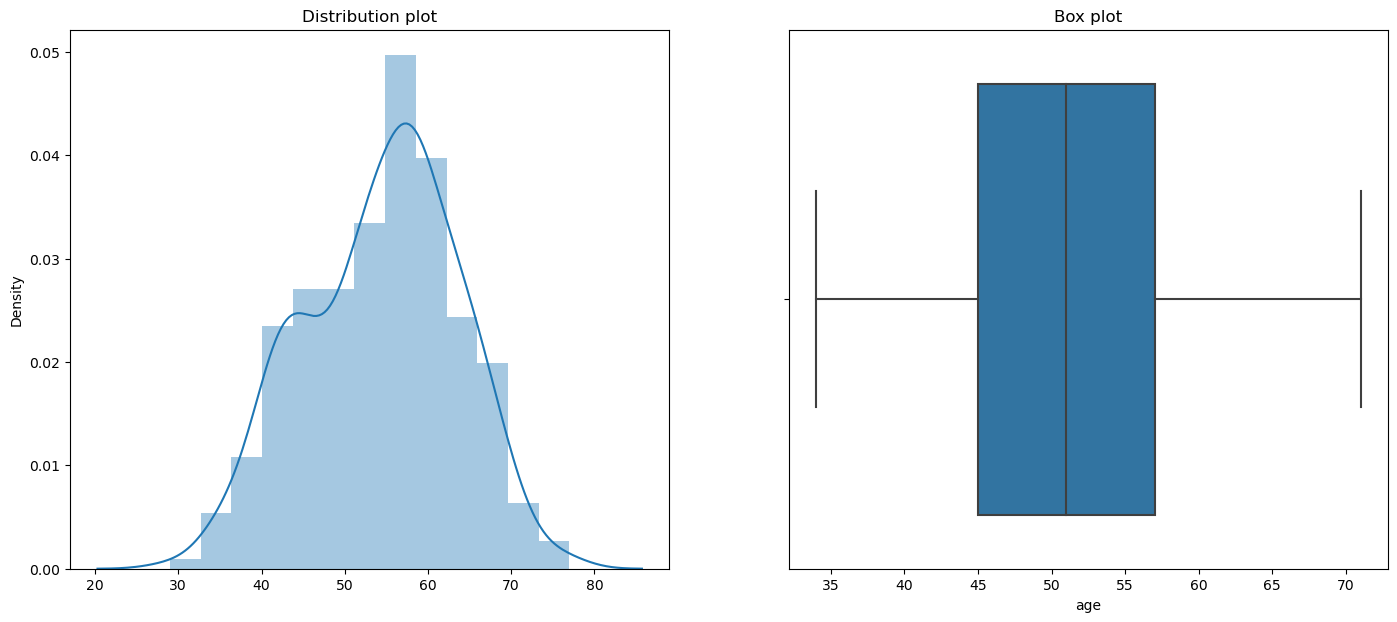

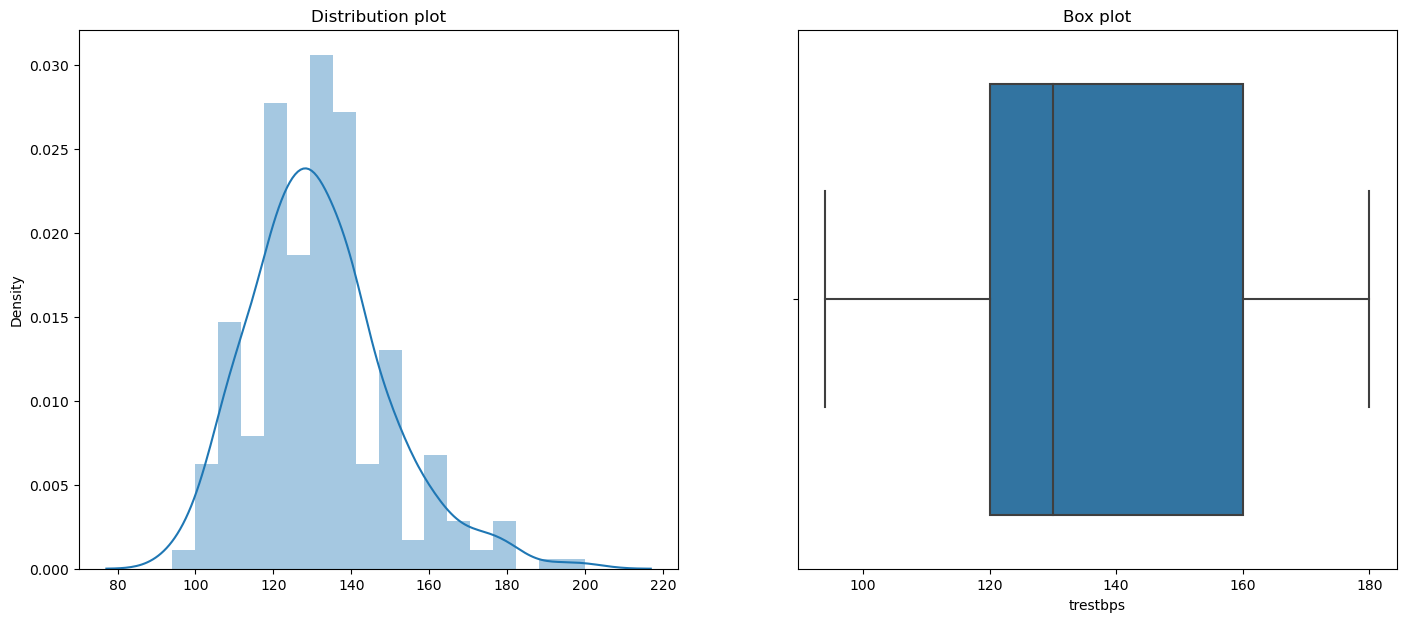

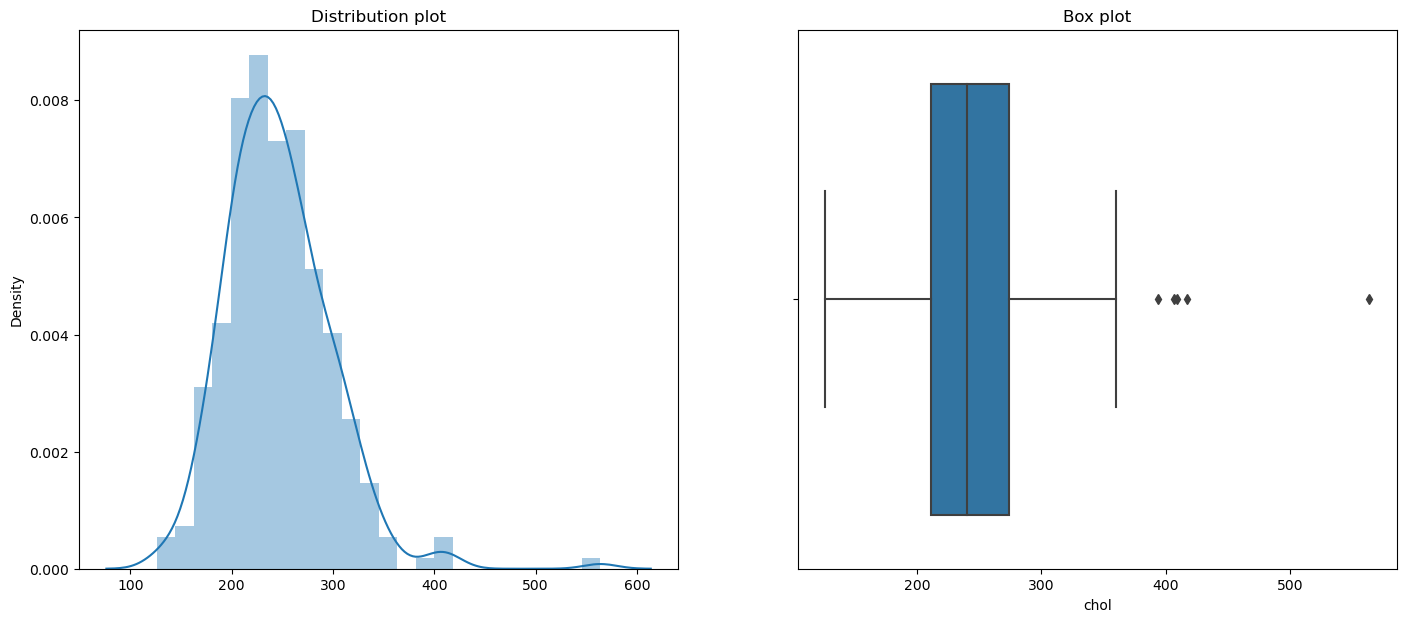

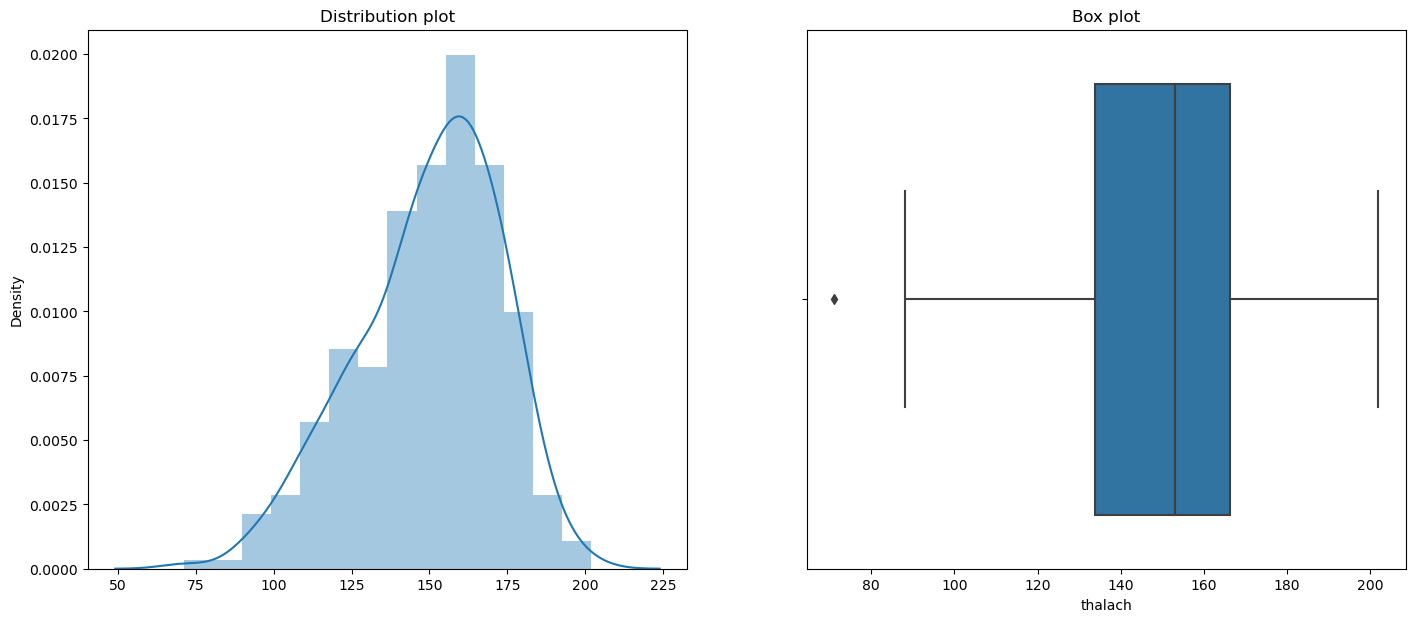

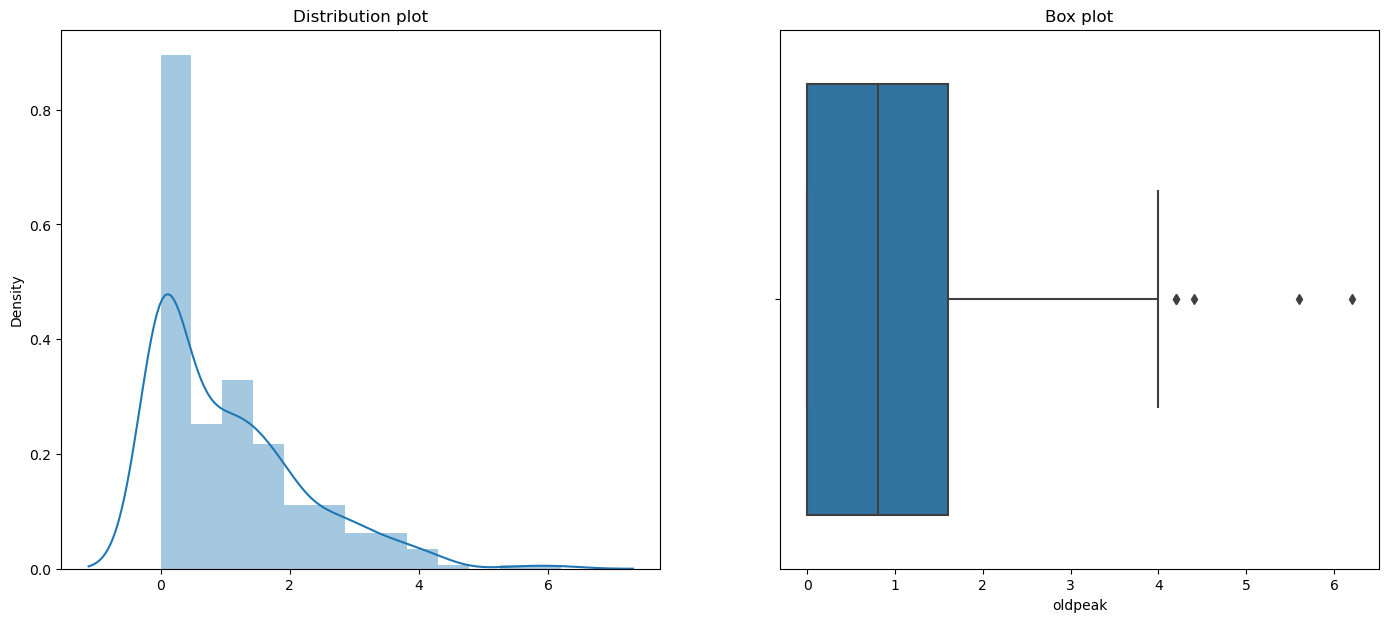

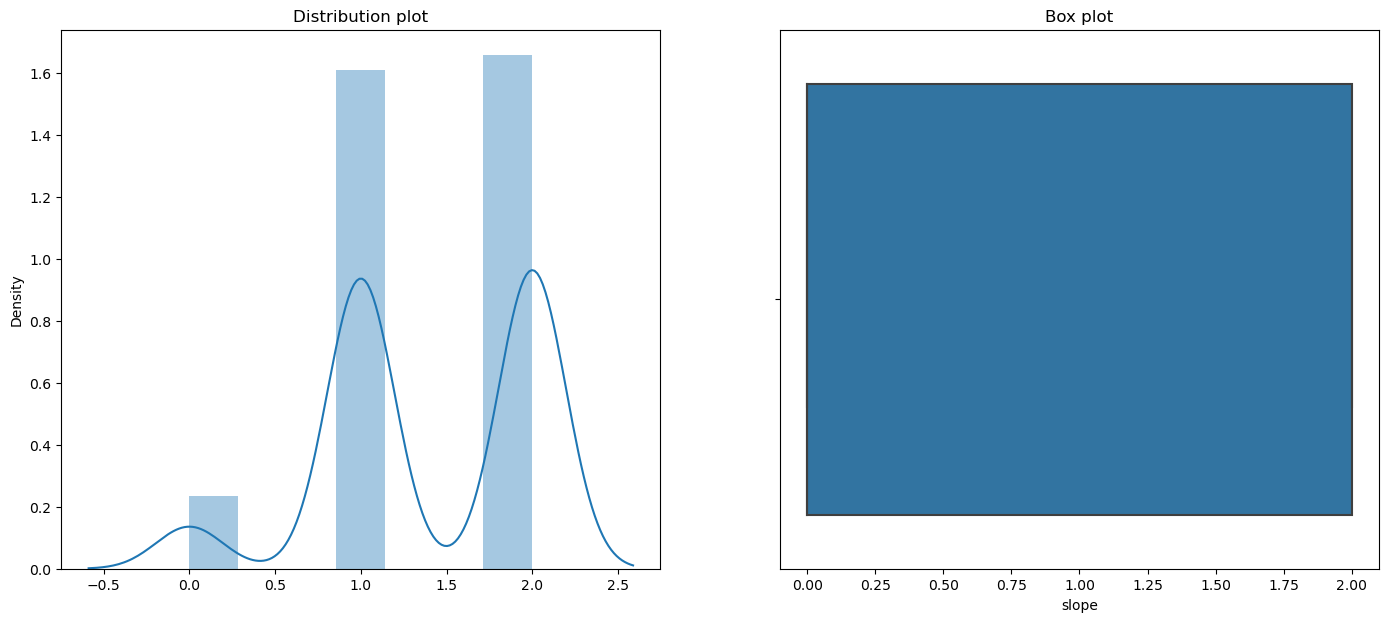

In [15]:
col=['age', 'trestbps', 'chol','thalach',
        'oldpeak', 'slope']

for i in col:
    q25,q75=np.percentile(df[i],25),np.percentile(df[i],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[i for i in df[i] if i < lower or i > upper]
    print('{} Total Number of  outliers {} is {} '.format('\033[1m',i,len(Outliers)))
    
    f, axes = plt.subplots(1, 2, figsize=(17,7))
    sns.boxplot(x = df[i], data=df[i],  orient='h' , ax=axes[1])
    sns.distplot(x=df[i],ax=axes[0])
    axes[0].set_title('Distribution plot')
    axes[1].set_title('Box plot')
   

### EDA
##### UNIVARIATE ANALYSIS-NUMERICAL COLUMN

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

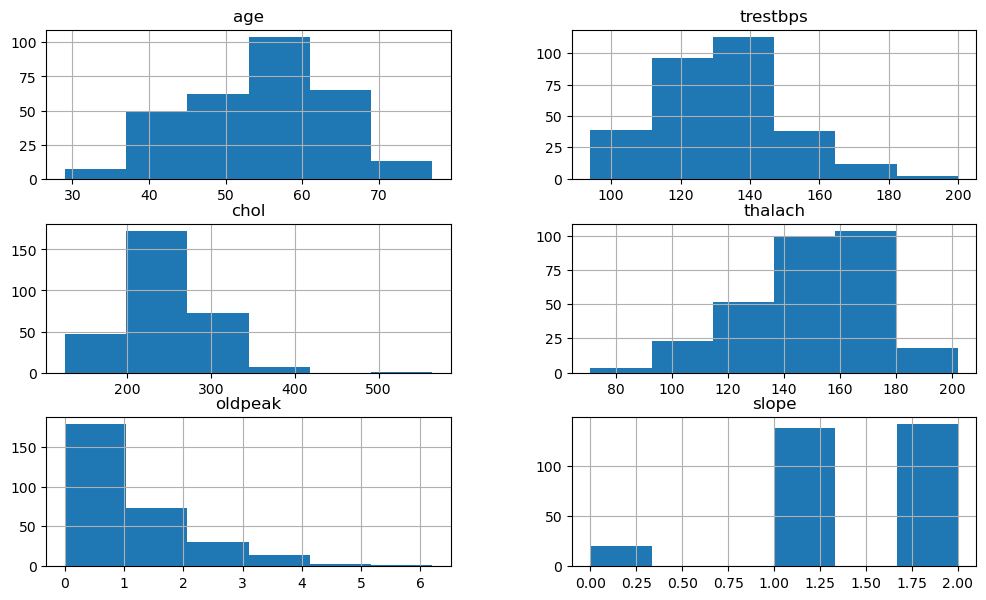

In [16]:
col=list(df.loc[0:-1])
df[col].hist(stacked=False,layout=(5,2),figsize=(12,12),bins=6)

Text(0.5, 1.0, 'Distribution of age')

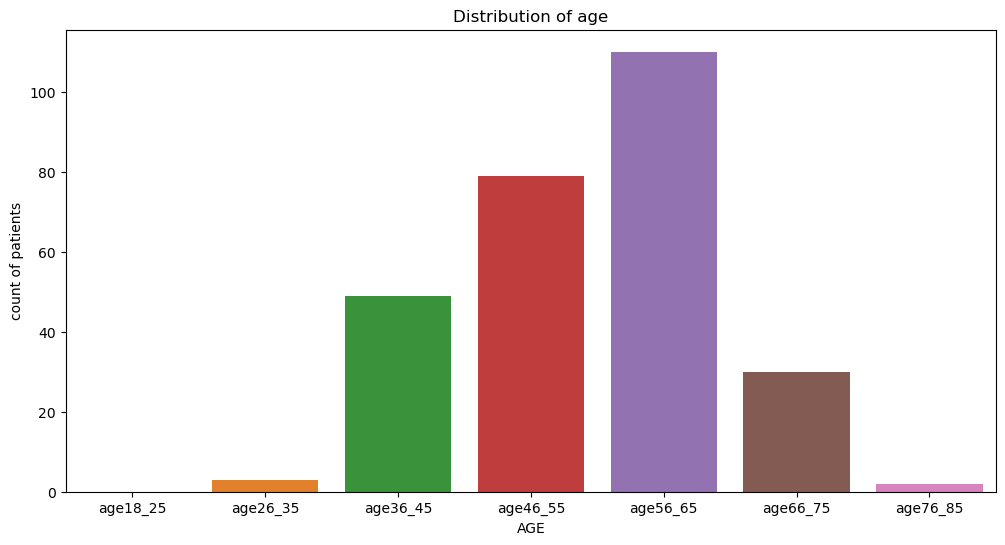

In [17]:
age18_25=df.age[(df.age>=18)&(df.age<25)]
age26_35=df.age[(df.age>=26)&(df.age<35)]
age36_45=df.age[(df.age>=36)&(df.age<45)]
age46_55=df.age[(df.age>=46)&(df.age<55)]
age56_65=df.age[(df.age>=56)&(df.age<65)]
age66_75=df.age[(df.age>=66)&(df.age<75)]
age76_85=df.age[(df.age>=76)&(df.age<85)]

x=["age18_25","age26_35","age36_45","age46_55","age56_65","age66_75","age76_85"]
y=[len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age56_65.values),len(age66_75.values),len(age76_85.values)]
plt.figure(figsize=(12,6))
sns.barplot(x=x,y=y)
plt.xlabel("AGE")
plt.ylabel("count of patients")
plt.title("Distribution of age")

In [18]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,233,1,0,150,0,2.3,0.0,0,1,1
1,37.0,1,2,130,250,0,1,187,0,3.5,0.0,0,2,1
2,41.0,0,1,130,204,0,0,172,0,1.4,2.0,0,2,1
3,56.0,1,1,120,236,0,1,178,0,0.8,2.0,0,2,1
4,57.0,0,0,120,354,0,1,163,1,0.6,2.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0,0,140,241,0,1,123,1,0.2,1.0,0,3,0
299,45.0,1,3,110,264,0,1,132,0,1.2,1.0,0,3,0
300,68.0,1,0,144,193,1,1,141,0,3.4,1.0,2,3,0
301,57.0,1,0,130,131,0,1,115,1,1.2,1.0,1,3,0


### dsitribution of categorical columns1m


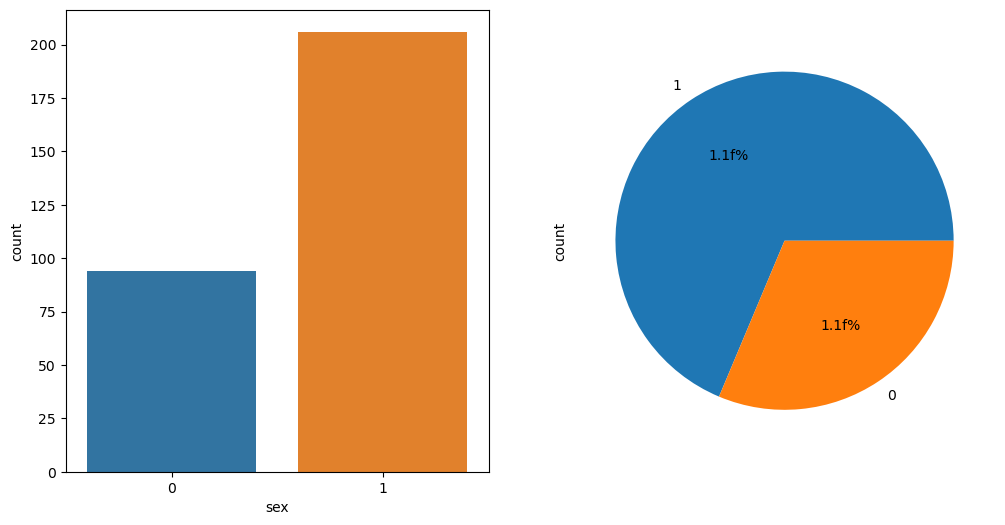

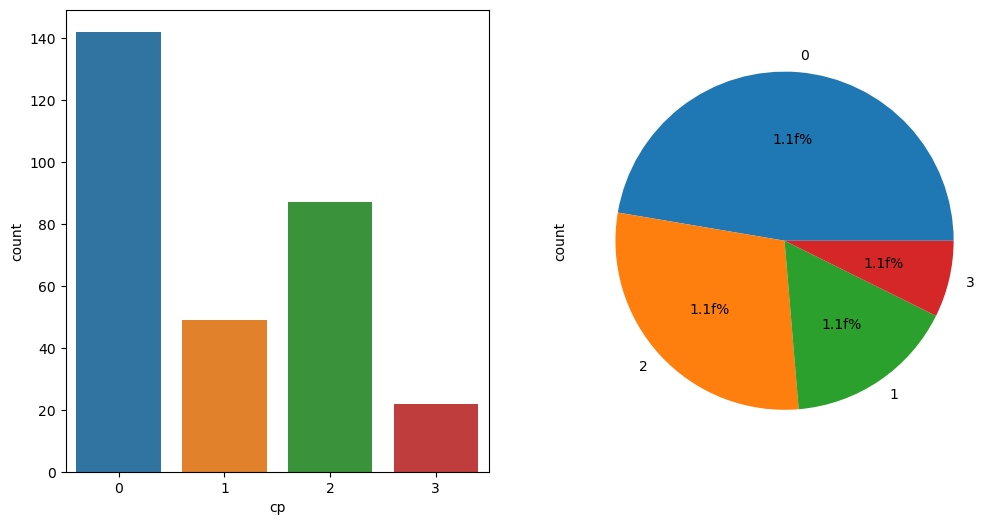

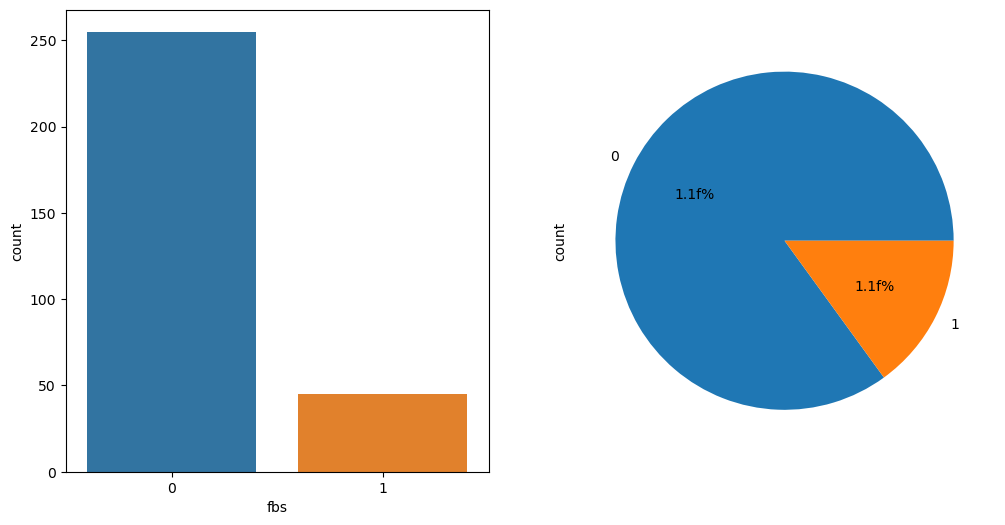

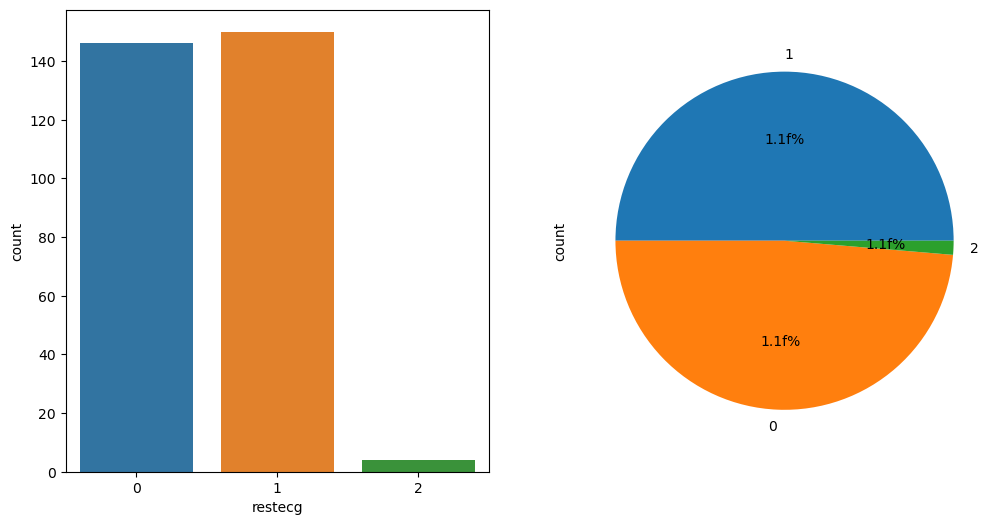

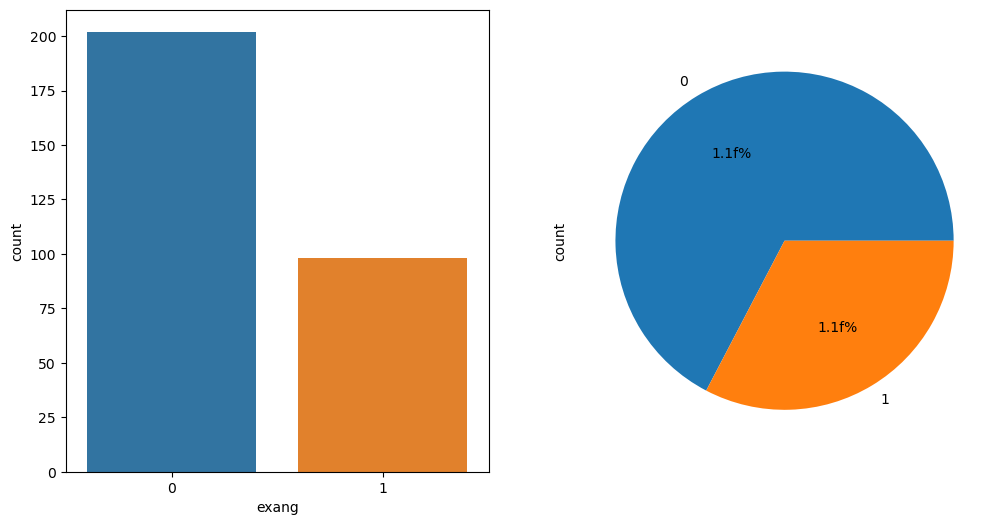

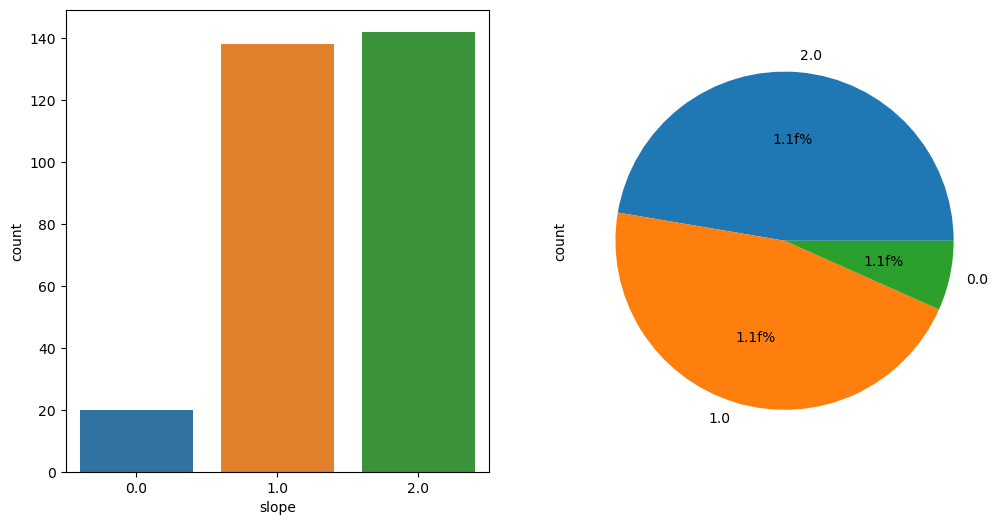

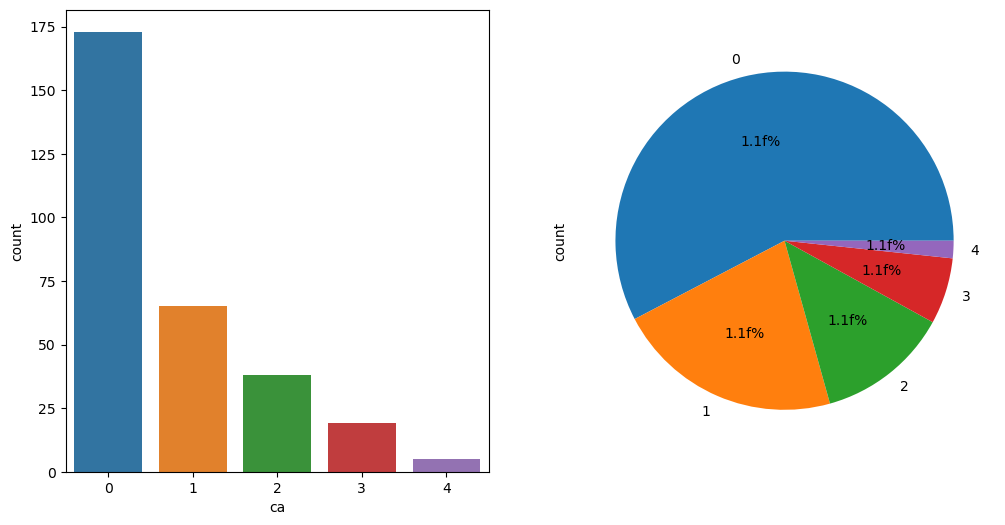

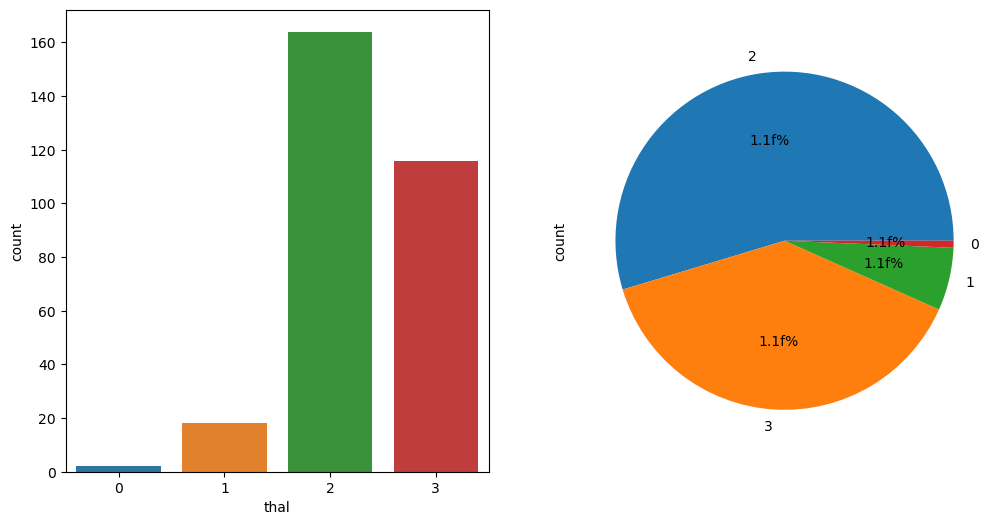

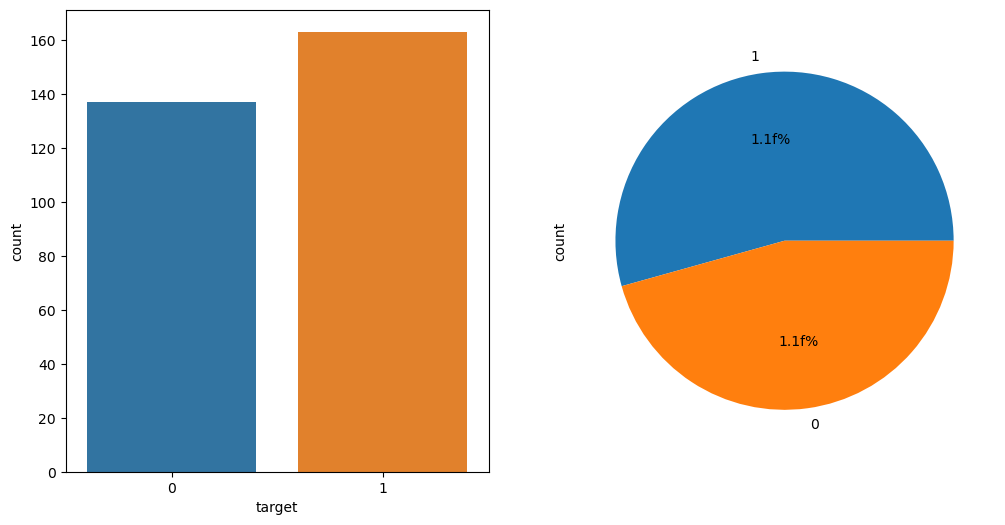

In [19]:
col=["sex","cp","fbs","restecg","exang","slope","ca","thal","target"]
for i in col:
    f,axes=plt.subplots(1,2,figsize=(12,6))
    sns.countplot(x=df[i],ax=axes[0])
    df[i].value_counts().plot.pie(autopct="1.1f%%",ax=axes[1])

### Bivariate analysis 

In [20]:
col=["sex","cp","fbs","restecg","exang","solpe","ca","thal","target"]

#### distribution of sex by target

Text(0.5, 1.0, 'Distribution of sex by target')

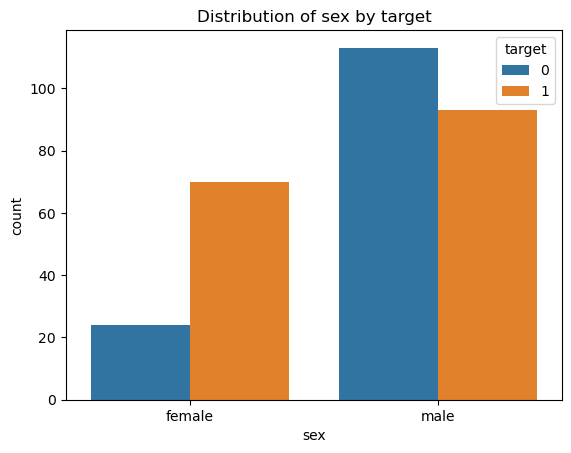

In [21]:
df2=df.copy()
df2["sex"]=df2["sex"].replace({1:"male",0:"female"})

sns.countplot(x="sex",hue="target",data=df2)
plt.title("Distribution of sex by target")


#### distribution of male by target

C:\Users\Rv\AppData\Local\Temp\ipykernel_20152\1798550352.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male_affect.age,label='male_affectd',bins=6)
C:\Users\Rv\AppData\Local\Temp\ipykernel_20152\1798550352.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(male_notaffect.age,label='male_

Text(0.5, 1.0, 'distribution of male by target')

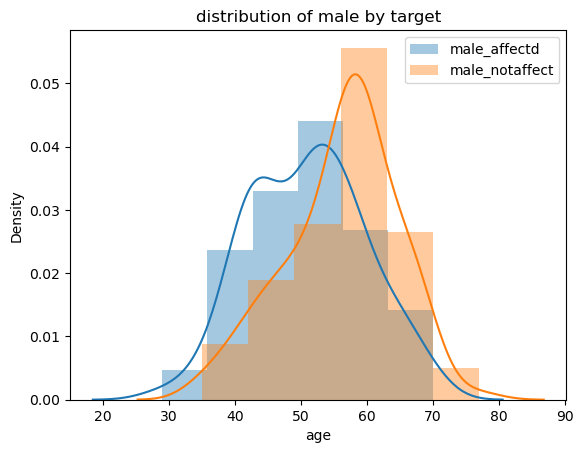

In [22]:

sex_male=df[df["sex"]==1]
male_affect=sex_male[(sex_male.target==1)]
male_notaffect=sex_male[(sex_male.target==0)]
sns.distplot(male_affect.age,label='male_affectd',bins=6)
sns.distplot(male_notaffect.age,label='male_notaffect',bins=6)
plt.legend()
plt.title("distribution of male by target")

#### distribution of female by target

C:\Users\Rv\AppData\Local\Temp\ipykernel_20152\526392555.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(female_affect.age,label='female_affectd',bins=6)
C:\Users\Rv\AppData\Local\Temp\ipykernel_20152\526392555.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(female_notaffect.age,label='f

Text(0.5, 1.0, 'distribution of female by target')

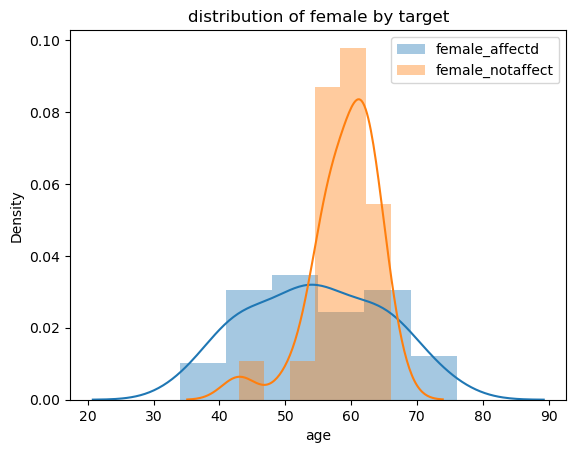

In [23]:
sex_female=df[df["sex"]==0]
female_affect=sex_female[sex_female.target==1]
female_notaffect=sex_female[sex_female.target==0]
sns.distplot(female_affect.age,label='female_affectd',bins=6)
sns.distplot(female_notaffect.age,label='female_notaffect',bins=6)
plt.legend()
plt.title("distribution of female by target")

#### distribution of chestpain by target

Text(0.5, 1.0, 'Distribution of chest pain by target')

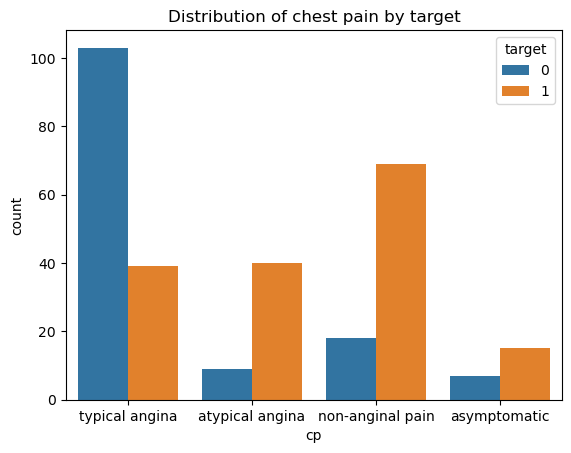

In [24]:
df2=df.copy()
df2["cp"]=df2["cp"].replace({0: "typical angina", 1: "atypical angina", 2: "non-anginal pain", 3: "asymptomatic"})
sns.countplot(x="cp",hue="target",data=df2)
plt.title("Distribution of chest pain by target")

#### Distribution of fbs(fast blood sugar) by target

Text(0.5, 1.0, 'distribution of fast blood suger by target')

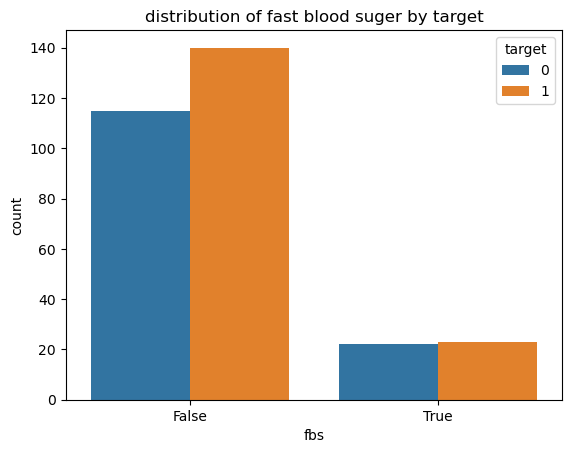

In [25]:
df2=df.copy()
df2["fbs"]=df2["fbs"].replace({0: "False", 1: "True"})
sns.countplot(x="fbs",hue="target",data=df2)
plt.title("distribution of fast blood suger by target")

### Distribution of restecg by target

Text(0.5, 1.0, 'Distribution of restecg by target')

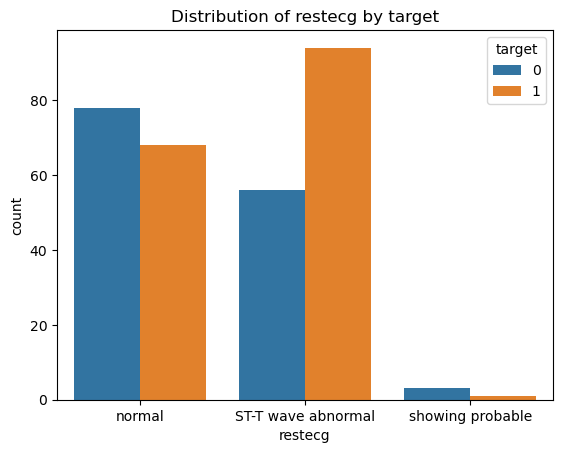

In [26]:
df2=df.copy()
df2["restecg"]=df2["restecg"].replace({0 :"normal", 1 :"ST-T wave abnormal", 2 :"showing probable"})
sns.countplot(x="restecg",hue="target",data=df2)
plt.title("Distribution of restecg by target")

Text(0.5, 1.0, 'Distribution of exercise include angina by target')

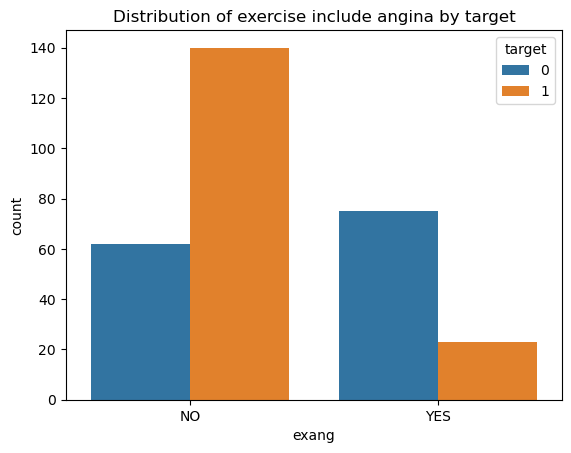

In [27]:
df2=df.copy()
df2["exang"]=df2["exang"].replace({0 :"NO", 1 :"YES"})
sns.countplot(x="exang",hue="target",data=df2)
plt.title("Distribution of exercise include angina by target")

#### distribution of ca by target

Text(0.5, 1.0, 'Distribution of exercise include angina by target')

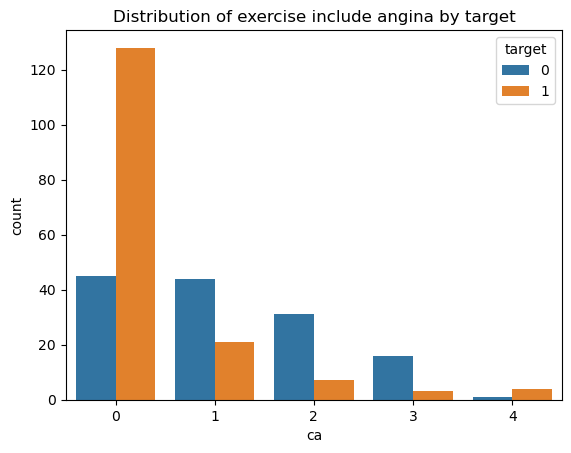

In [28]:
df2=df.copy()

sns.countplot(x="ca",hue="target",data=df2)
plt.title("Distribution of exercise include angina by target")

#### distribution of thalassemia by target

Text(0.5, 1.0, 'Distribution of thalassemia by target')

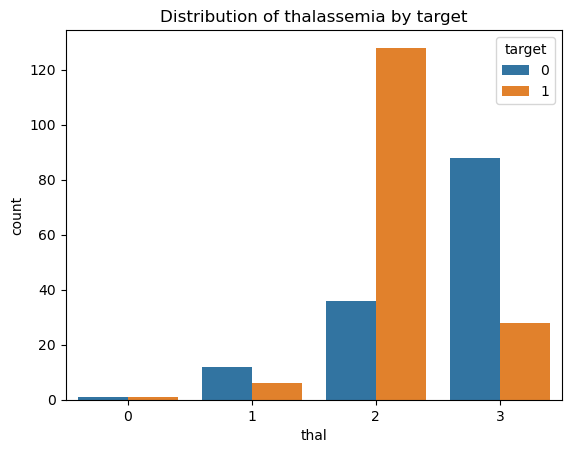

In [29]:
df2=df.copy()
#df2["exang"]=df2["exang"].replace({0 :"NO", 1 :"YES"})
sns.countplot(x="thal",hue="target",data=df2)
plt.title("Distribution of thalassemia by target")

Text(0.5, 1.0, 'Distribution of sloping by target')

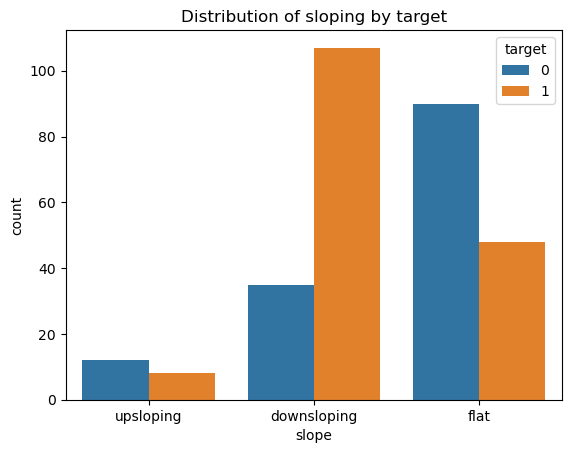

In [30]:
df2=df.copy()
df2["slope"]=df2["slope"].replace({0.0:"upsloping", 1.0 :"flat",2.0 :"downsloping"})
sns.countplot(x="slope",hue="target",data=df2)
plt.title("Distribution of sloping by target")

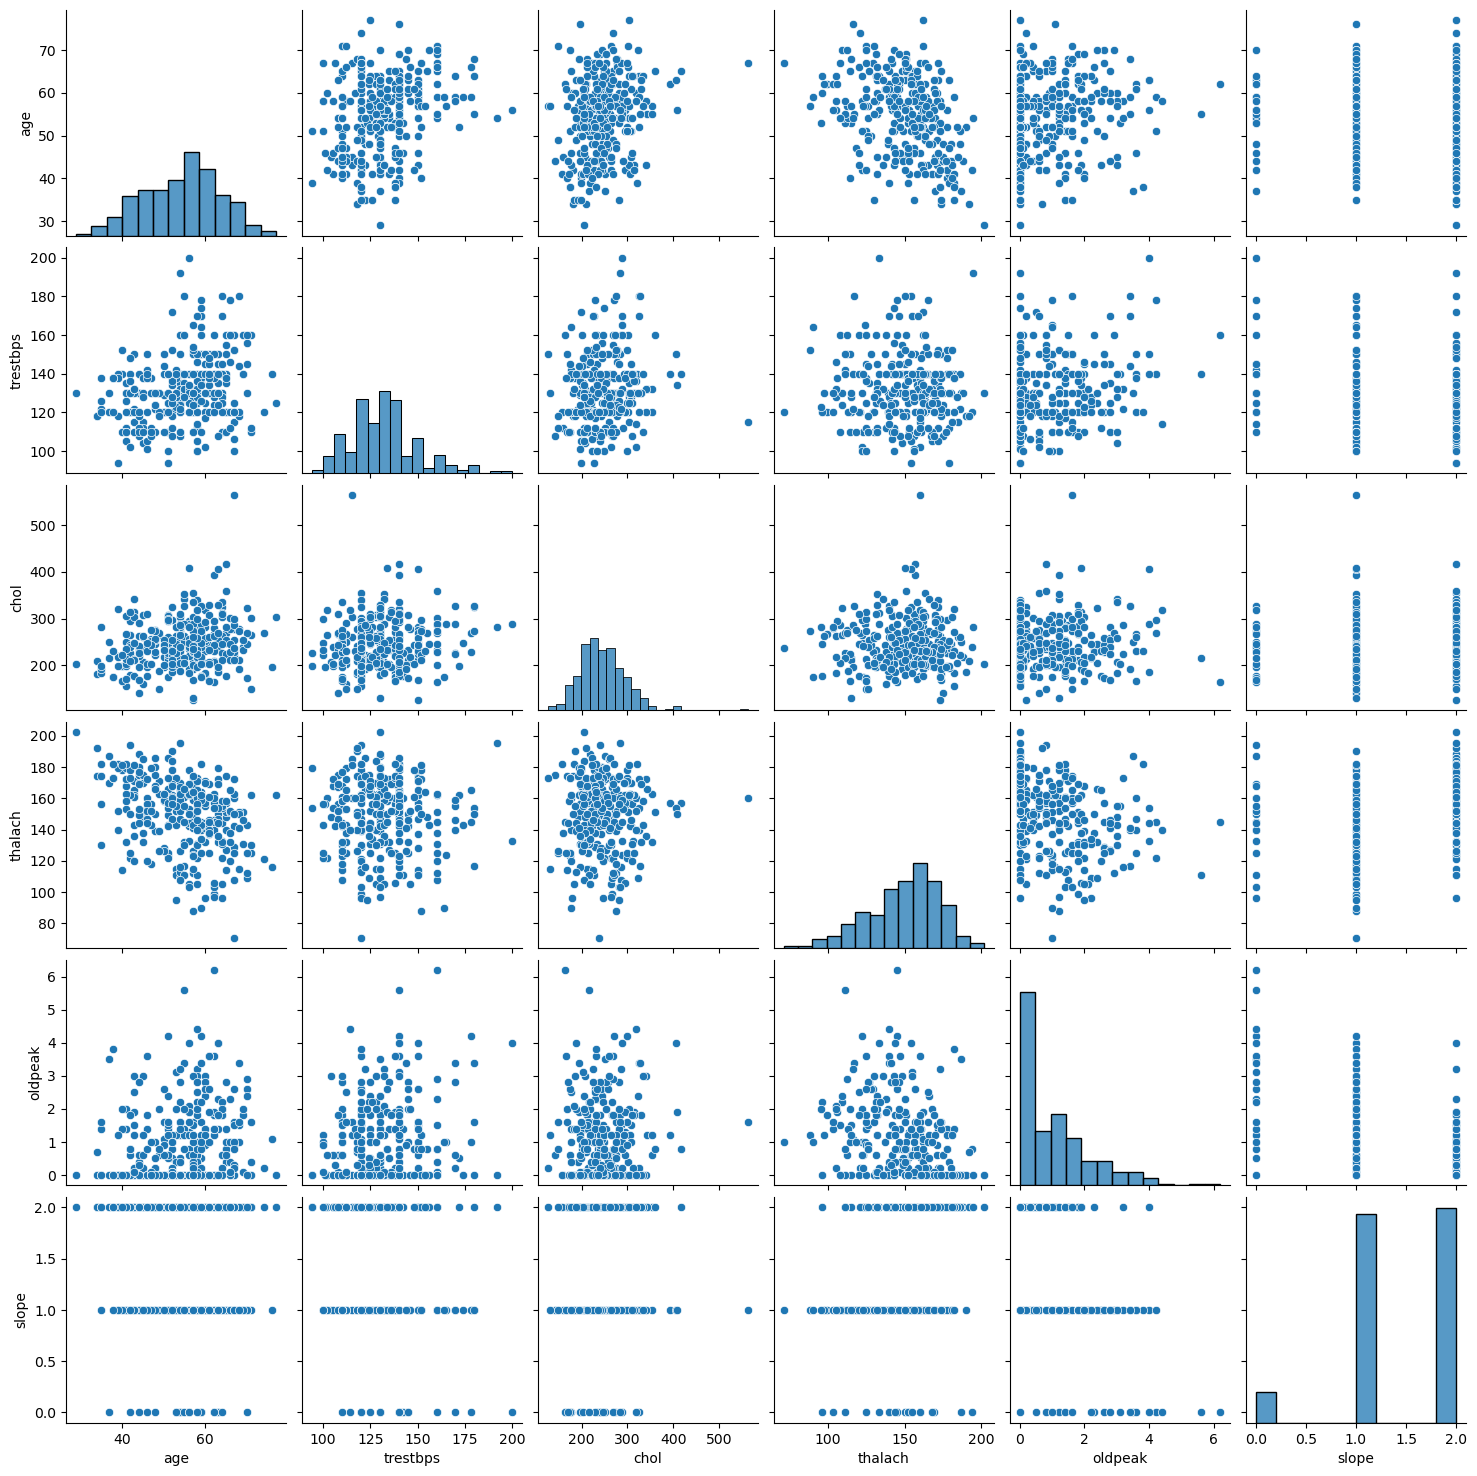

In [31]:
sns.pairplot(data=df)

## HYPOTHESIS TESTING

**statistic testing for continous variable with target variable**

**Ho(Null Hypothesis):There is no significant difference in independent feature with different category of Target variable**

**H1(Alternate Hypothesis):There is significant difference in independent feature with different category of Target variable**

In [32]:
from scipy import stats
col=list(df.select_dtypes(include=['int64','float64']).columns)

In [33]:
for i in col:
    x = np.array(df[df.target == 0][i]) 
    y = np.array(df[df.target == 1][i])
    t, p_value  = stats.ttest_ind(x,y, axis = 0,equal_var=False) 
    print('{} P_Value:{}'.format('\033[1m',p_value))
    
    if p_value < 0.05: 
        # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.\n There is no significant relationship between {} and lung cancer'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.\nThere is significant relationship between {} and lung cancer'.format('\033[1m',i))
    print('\n')

 P_Value:3.3452702151102293e-05
 Rejecting Null Hypothesis.
 There is no significant relationship between age and lung cancer


 P_Value:0.011630873586966196
 Rejecting Null Hypothesis.
 There is no significant relationship between trestbps and lung cancer


 P_Value:0.15464290941107106
 Fail to Reject Null Hypothesis.
There is significant relationship between chol and lung cancer


 P_Value:2.6172492369945702e-14
 Rejecting Null Hypothesis.
 There is no significant relationship between thalach and lung cancer


 P_Value:4.0582924645037425e-14
 Rejecting Null Hypothesis.
 There is no significant relationship between oldpeak and lung cancer


 P_Value:1.6153012024715415e-10
 Rejecting Null Hypothesis.
 There is no significant relationship between slope and lung cancer




**statistic testing for categorical variable with target variable**

**Ho(Null Hypothesis):There is no significant difference in categorical feature with different category of Target variable**

**H1(Alternate Hypothesis):There is significant difference in categorical feature with different category of Target variable**

In [34]:
col=list(df.select_dtypes(include=['category']).columns)

In [35]:
for i in col:
    corsstab=pd.crosstab(df["target"],df[i])
    p,chi2,_,_=stats.chi2_contingency(corsstab)
    print('{} P_Value:{}'.format('\033[1m',p_value))
    
    if p_value < 0.05: 
        # Setting our significance level at 5%
        print('{} Rejecting Null Hypothesis.\n There is no significant relationship between {} and lung cancer'.format('\033[1m',i))
    else:
        print('{} Fail to Reject Null Hypothesis.\nThere is significant relationship between {} and lung cancer'.format('\033[1m',i))
    print('\n')

 P_Value:1.6153012024715415e-10
 Rejecting Null Hypothesis.
 There is no significant relationship between sex and lung cancer


 P_Value:1.6153012024715415e-10
 Rejecting Null Hypothesis.
 There is no significant relationship between cp and lung cancer


 P_Value:1.6153012024715415e-10
 Rejecting Null Hypothesis.
 There is no significant relationship between fbs and lung cancer


 P_Value:1.6153012024715415e-10
 Rejecting Null Hypothesis.
 There is no significant relationship between restecg and lung cancer


 P_Value:1.6153012024715415e-10
 Rejecting Null Hypothesis.
 There is no significant relationship between exang and lung cancer


 P_Value:1.6153012024715415e-10
 Rejecting Null Hypothesis.
 There is no significant relationship between ca and lung cancer


 P_Value:1.6153012024715415e-10
 Rejecting Null Hypothesis.
 There is no significant relationship between thal and lung cancer


 P_Value:1.6153012024715415e-10
 Rejecting Null Hypothesis.
 There is no significant relationship b

## DATA PREPROCESSING

##### OUTLIER ANALYSIS 

**before mean imputing**

<Axes: >

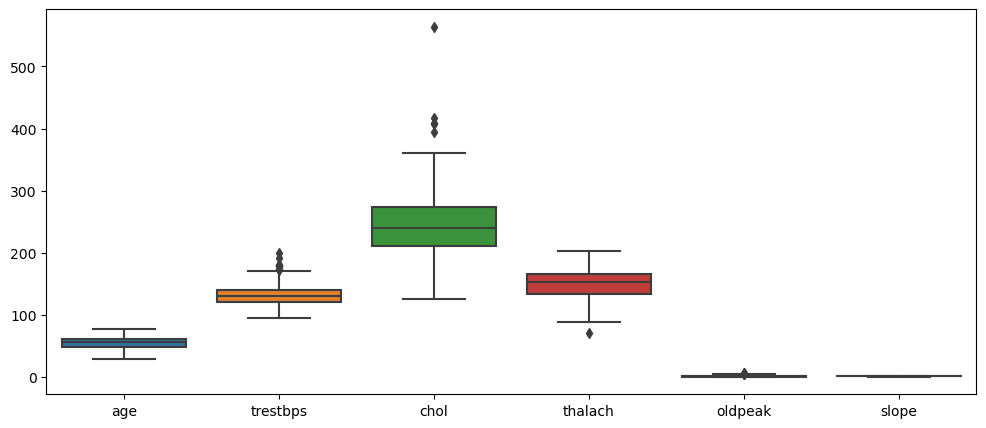

In [36]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df)

In [37]:
col=['age', 'trestbps', 'chol','thalach',
        'oldpeak', 'slope']


for i in col:
    q25,q75=np.percentile(df[i],25),np.percentile(df[i],75)
    IQR=q75-q25
    Threshold=IQR*1.5
    lower,upper=q25-Threshold,q75+Threshold
    Outliers=[x for x in df[i] if x < lower or x > upper]
    
    print('{} Total Number of  outliers before imputing {} is {} '.format('\033[1m',i,len(Outliers)))
   
    #ipute the mean value
    df_inc=df.loc[(df[i]>=lower)&(df[i]<=upper)]
    mean=int(df_inc[i].mean())
    print("{} The mean values of {} is {}".format("\033[1m",i,mean))
    
    # after imputing
    df[i]=np.where(df[i]<lower,mean,df[i])
    df[i]=np.where(df[i]>upper,mean,df[i])
    outliers=[x for x in df[i] if x>upper or x<lower]
    print('{} Total Number of  outliers after imputing {} is {} '.format('\033[1m',i,len(Outliers)))
    print("\n\n")
   


 Total Number of  outliers before imputing age is 0 
 The mean values of age is 54
 Total Number of  outliers after imputing age is 0 



 Total Number of  outliers before imputing trestbps is 9 
 The mean values of trestbps is 129
 Total Number of  outliers after imputing trestbps is 9 



 Total Number of  outliers before imputing chol is 5 
 The mean values of chol is 242
 Total Number of  outliers after imputing chol is 5 



 Total Number of  outliers before imputing thalach is 1 
 The mean values of thalach is 149
 Total Number of  outliers after imputing thalach is 1 



 Total Number of  outliers before imputing oldpeak is 5 
 The mean values of oldpeak is 0
 Total Number of  outliers after imputing oldpeak is 5 



 Total Number of  outliers before imputing slope is 0 
 The mean values of slope is 1
 Total Number of  outliers after imputing slope is 0 





#### after imputing

<Axes: >

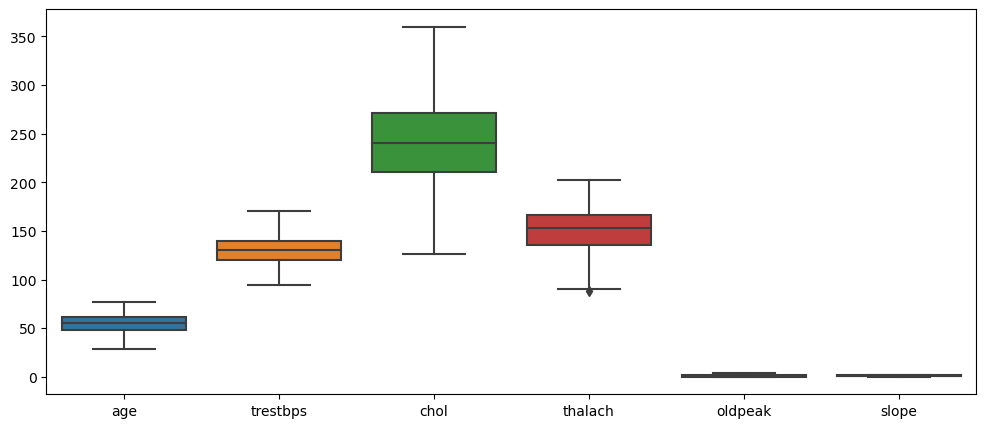

In [38]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df)

### MODEL BUILDING

In [49]:
col=["sex","cp","fbs","restecg","exang","ca","thal"]
for i in col:
    df[i]=df[i].astype("int64")
    df
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       300 non-null    float64 
 1   sex       300 non-null    int64   
 2   cp        300 non-null    int64   
 3   trestbps  300 non-null    int64   
 4   chol      300 non-null    int64   
 5   fbs       300 non-null    int64   
 6   restecg   300 non-null    int64   
 7   thalach   300 non-null    int64   
 8   exang     300 non-null    int64   
 9   oldpeak   300 non-null    float64 
 10  slope     300 non-null    float64 
 11  ca        300 non-null    int64   
 12  thal      300 non-null    int64   
 13  target    300 non-null    category
dtypes: category(1), float64(3), int64(10)
memory usage: 41.3 KB


In [50]:

from scipy.stats import zscore
x=df.drop("target",axis=1)


y=df["target"]

In [60]:
X=x.apply(zscore)
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02
mean,2.013204e-16,7.105427e-17,-2.368476e-17,3.315866e-16,-2.309264e-16,-2.368476e-17,1.657933e-16,-2.605323e-16,-4.736952e-17,-4.736952e-17,-1.421085e-16,4.736952e-17,-1.894781e-16
std,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00,1.001671e+00
min,-2.799061e+00,-1.480368e+00,-9.377435e-01,-2.377175e+00,-2.614285e+00,-4.200840e-01,-1.002574e+00,-2.765136e+00,-6.965260e-01,-9.184480e-01,-2.298235e+00,-7.153272e-01,-3.776874e+00
25%,-7.309253e-01,-1.480368e+00,-9.377435e-01,-6.576196e-01,-7.112771e-01,-4.200840e-01,-1.002574e+00,-6.464572e-01,-6.965260e-01,-9.184480e-01,-6.644186e-01,-7.153272e-01,-5.115651e-01
50%,1.239043e-01,6.755077e-01,3.569266e-02,3.747749e-03,-6.201566e-02,-4.200840e-01,9.010472e-01,1.341086e-01,-6.965260e-01,-3.440191e-01,-6.644186e-01,-7.153272e-01,-5.115651e-01
75%,7.305576e-01,6.755077e-01,1.009129e+00,6.651151e-01,6.432166e-01,-4.200840e-01,9.010472e-01,7.251085e-01,1.435697e+00,6.133625e-01,9.693977e-01,2.690680e-01,1.121089e+00
max,2.495367e+00,6.755077e-01,1.982565e+00,2.649217e+00,2.624583e+00,2.380476e+00,2.804668e+00,2.319693e+00,1.435697e+00,2.911078e+00,9.693977e-01,3.222254e+00,1.121089e+00


In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=None)
print("----------------------------------------------------------------------------")
print((" The x trains data is : {0:0.2f}%".format((len(X_train)/len(df))*100)),X_train.shape)
print((" The y trains data is : {0:0.2f}%".format((len(y_train)/len(df))*100)),y_train.shape)
print((" The x test data is : {0:0.2f}%".format((len(X_test)/len(df))*100)),X_test.shape)
print((" The y test data is : {0:0.2f}%".format((len(y_test)/len(df))*100)),y_test.shape)
print("-------------------------------------------------------------------------")



----------------------------------------------------------------------------
 The x trains data is : 70.00% (210, 13)
 The y trains data is : 70.00% (210,)
 The x test data is : 30.00% (90, 13)
 The y test data is : 30.00% (90,)
-------------------------------------------------------------------------


#### LOGISTIC MODEL

Accuracy on Training data: 0.8476190476190476
Accuracy on Test data: 0.8555555555555555
---------------------------------------------------------
precision score: 0.8166666666666667
recall score: 0.9607843137254902
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.72      0.81        39
           1       0.82      0.96      0.88        51

    accuracy                           0.86        90
   macro avg       0.88      0.84      0.85        90
weighted avg       0.87      0.86      0.85        90

-----------------------------------------------------------
accuracy score:  85.56 %


Text(50.722222222222214, 0.5, 'Actual')

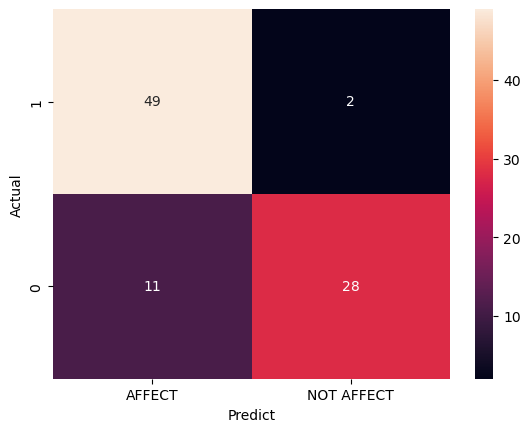

In [155]:
logit = LogisticRegression(random_state=0)
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)

print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )
print("---------------------------------------------------------")
print("precision score:",precision_score(y_test,logit_pred))
print("recall score:",recall_score(y_test,logit_pred))

print("-----------------------------------------------------------")

print(metrics.classification_report(y_test,logit_pred))

print("-----------------------------------------------------------")


print("accuracy score: ",round(accuracy_score(y_test,logit_pred)*100,2),"%")

cm=metrics.confusion_matrix(y_test,logit_pred,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[c for c in [1,0]],
                  columns=[c for c in ["AFFECT","NOT AFFECT"]])

sns.heatmap(df_cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")

### KNN MODEL

Accuracy on Training data: 0.8523809523809524
Accuracy on Test data: 0.8
---------------------------------------------------------
precision score: 0.7704918032786885
recall score: 0.9215686274509803
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.64      0.74        39
           1       0.77      0.92      0.84        51

    accuracy                           0.80        90
   macro avg       0.82      0.78      0.79        90
weighted avg       0.81      0.80      0.79        90

-----------------------------------------------------------
accuracy score:  80.0 %


Text(50.722222222222214, 0.5, 'Actual')

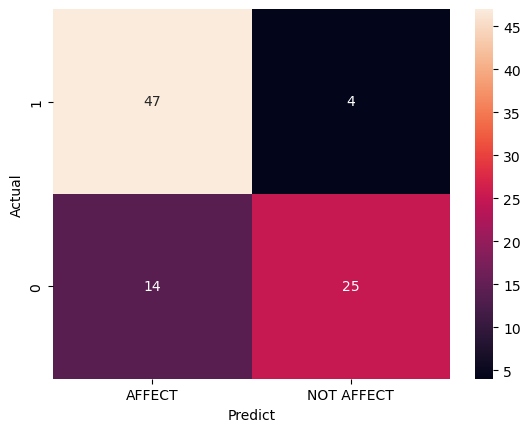

In [78]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print('Accuracy on Training data:',knn.score(X_train, y_train) )
print('Accuracy on Test data:',knn.score(X_test, y_test) )
print("---------------------------------------------------------")
print("precision score:",precision_score(y_test,knn_pred))
print("recall score:",recall_score(y_test,knn_pred))

print("-----------------------------------------------------------")

print(metrics.classification_report(y_test,knn_pred))

print("-----------------------------------------------------------")


print("accuracy score: ",round(accuracy_score(y_test,knn_pred)*100,2),"%")

cm=metrics.confusion_matrix(y_test,knn_pred,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[c for c in [1,0]],
                  columns=[c for c in ["AFFECT","NOT AFFECT"]])

sns.heatmap(df_cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")

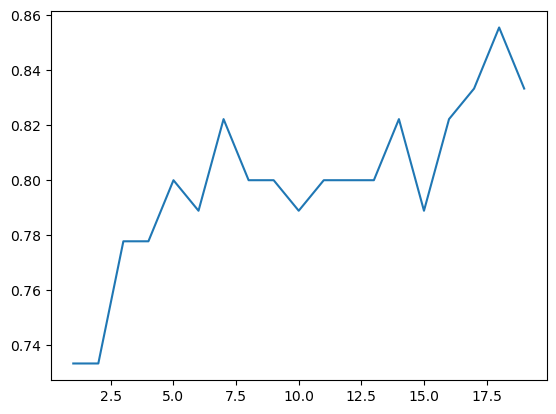

In [79]:
### fin dthe optimum k value
test_score=[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    test_score.append(knn.score(X_test,y_test))
test_score


plt.plot(range(1,20),test_score)

**THE OPTIMUM K VALUE IS 17**

Accuracy on Training data: 0.8333333333333334
Accuracy on Test data: 0.8333333333333334
---------------------------------------------------------
precision score: 0.78125
recall score: 0.9803921568627451
-----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.64      0.77        39
           1       0.78      0.98      0.87        51

    accuracy                           0.83        90
   macro avg       0.87      0.81      0.82        90
weighted avg       0.86      0.83      0.83        90

-----------------------------------------------------------
accuracy score:  83.33 %


Text(50.722222222222214, 0.5, 'Actual')

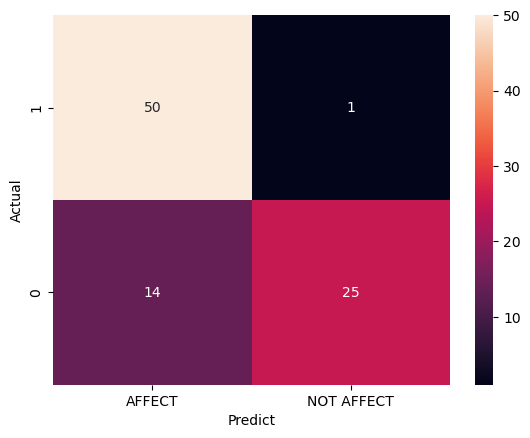

In [81]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print('Accuracy on Training data:',knn.score(X_train, y_train) )
print('Accuracy on Test data:',knn.score(X_test, y_test) )
print("---------------------------------------------------------")
print("precision score:",precision_score(y_test,knn_pred))
print("recall score:",recall_score(y_test,knn_pred))

print("-----------------------------------------------------------")

print(metrics.classification_report(y_test,knn_pred))

print("-----------------------------------------------------------")

print("accuracy score: ",round(accuracy_score(y_test,knn_pred)*100,2),"%")

cm=metrics.confusion_matrix(y_test,knn_pred,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[c for c in [1,0]],
                  columns=[c for c in ["AFFECT","NOT AFFECT"]])

sns.heatmap(df_cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")

### GAUSSIAN MODEL

training data: 0.8428571428571429
testing data: 0.8444444444444444
-------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.74      0.81        39
           1       0.82      0.92      0.87        51

    accuracy                           0.84        90
   macro avg       0.85      0.83      0.84        90
weighted avg       0.85      0.84      0.84        90

-----------------------------------------------------------------
accuracy score:  84.44 %
-----------------------------------------------------------------
confusion matrix


Text(50.722222222222214, 0.5, 'Actual')

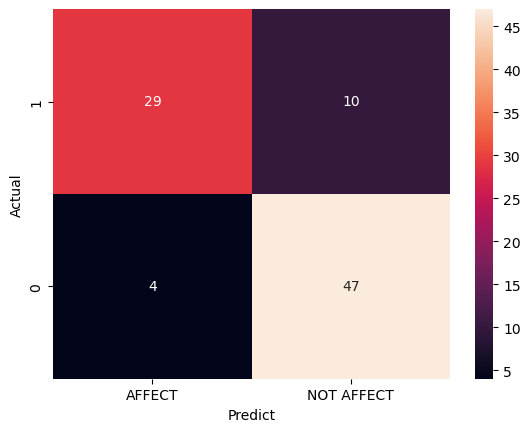

In [75]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()#by using default parameter
nb.fit(X_train,y_train)
nb_pre=nb.predict(X_test)#predict the test values


print("training data:",nb.score(X_train,y_train))
print("testing data:",nb.score(X_test,y_test))
print("-------------------------------------------------------------")
print(metrics.classification_report(y_test,nb_pre))
print("-----------------------------------------------------------------")





print("accuracy score: ",round(accuracy_score(y_test,nb_pre)*100,2),"%")
print("-----------------------------------------------------------------")
print("confusion matrix")
confusion_matrix(y_test,nb_pre)


cm=metrics.confusion_matrix(y_test,nb_pre)
df_cm=pd.DataFrame(cm,index=[c for c in [1,0]],
                  columns=[c for c in ["AFFECT","NOT AFFECT"]])

sns.heatmap(df_cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")


### SVM MODEL

training data: 0.9142857142857143
testing data: 0.8111111111111111
-------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.69      0.76        39
           1       0.79      0.90      0.84        51

    accuracy                           0.81        90
   macro avg       0.82      0.80      0.80        90
weighted avg       0.82      0.81      0.81        90

-----------------------------------------------------------------
accuracy score:  81.11 %
-----------------------------------------------------------------
confusion matrix


Text(50.722222222222214, 0.5, 'Actual')

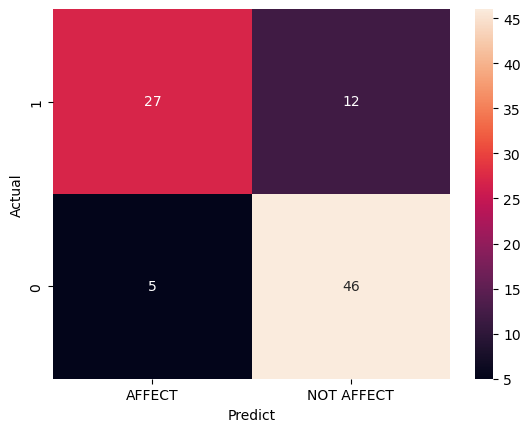

In [76]:
svc=SVC()#by using default parameter
svc.fit(X_train,y_train)
svc_pre=svc.predict(X_test)#predict the test values


print("training data:",svc.score(X_train,y_train))
print("testing data:",svc.score(X_test,y_test))
print("-------------------------------------------------------------")
print(metrics.classification_report(y_test,svc_pre))
print("-----------------------------------------------------------------")
print("accuracy score: ",round(accuracy_score(y_test,svc_pre)*100,2),"%")
print("-----------------------------------------------------------------")
print("confusion matrix")
confusion_matrix(y_test,svc_pre)


cm=metrics.confusion_matrix(y_test,svc_pre)
df_cm=pd.DataFrame(cm,index=[c for c in [1,0]],
                  columns=[c for c in ["AFFECT","NOT AFFECT"]])

sns.heatmap(df_cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")


### Random forest

training data: 1.0
testing data: 0.8444444444444444
-------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        39
           1       0.84      0.90      0.87        51

    accuracy                           0.84        90
   macro avg       0.85      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90

-----------------------------------------------------------------
accuracy score:  84.44 %
-----------------------------------------------------------------
confusion matrix


Text(50.722222222222214, 0.5, 'Actual')

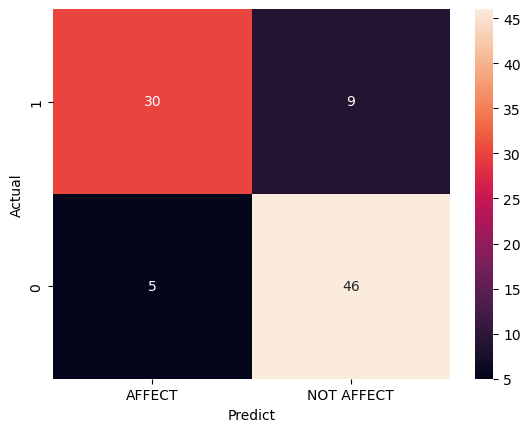

In [154]:
rfc=RandomForestClassifier(random_state=0)#by using default parameter
rfc.fit(X_train,y_train)
rfc_pre=rfc.predict(X_test)#predict the test values


print("training data:",rfc.score(X_train,y_train))
print("testing data:",rfc.score(X_test,y_test))
print("-------------------------------------------------------------")
print(metrics.classification_report(y_test,rfc_pre))
print("-----------------------------------------------------------------")
print("accuracy score: ",round(accuracy_score(y_test,rfc_pre)*100,2),"%")
print("-----------------------------------------------------------------")
print("confusion matrix")
confusion_matrix(y_test,rfc_pre)



cm=metrics.confusion_matrix(y_test,rfc_pre)
df_cm=pd.DataFrame(cm,index=[c for c in [1,0]],
                  columns=[c for c in ["AFFECT","NOT AFFECT"]])

sns.heatmap(df_cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")

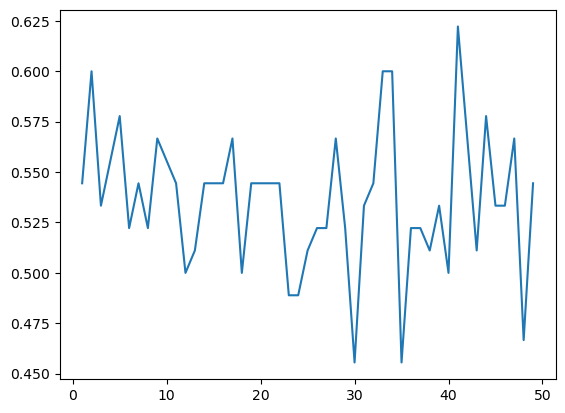

In [65]:
test_score=[]
for i in range(1,50):
    rf=RandomForestClassifier(n_estimators=i)
    rf.fit(X_train,y_train)
    rf_pre=rf.predict(X_test)
    test_score.append(rf.score(X_test,y_test))
plt.plot(range(1,50),test_score)

training data: 0.9952380952380953
testing data: 0.8444444444444444
-------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.77      0.81        39
           1       0.84      0.90      0.87        51

    accuracy                           0.84        90
   macro avg       0.85      0.84      0.84        90
weighted avg       0.85      0.84      0.84        90

-----------------------------------------------------------------
accuracy score:  84.44 %
-----------------------------------------------------------------
confusion matrix


Text(50.722222222222214, 0.5, 'Actual')

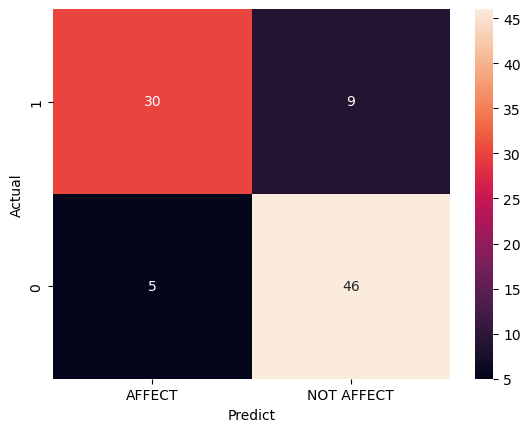

In [153]:
rfc=RandomForestClassifier(n_estimators=43,random_state=0)#by using default parameter
rfc.fit(X_train,y_train)
rfc_pre=rfc.predict(X_test)#predict the test values


print("training data:",rfc.score(X_train,y_train))
print("testing data:",rfc.score(X_test,y_test))
print("-------------------------------------------------------------")
print(metrics.classification_report(y_test,rfc_pre))
print("-----------------------------------------------------------------")
print("accuracy score: ",round(accuracy_score(y_test,rfc_pre)*100,2),"%")
print("-----------------------------------------------------------------")
print("confusion matrix")
confusion_matrix(y_test,rfc_pre)



cm=metrics.confusion_matrix(y_test,rfc_pre)
df_cm=pd.DataFrame(cm,index=[c for c in [1,0]],
                  columns=[c for c in ["AFFECT","NOT AFFECT"]])

sns.heatmap(df_cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")

In [83]:
d_tree=DecisionTreeClassifier(random_state=0)#by using default parameter
d_tree.fit(X_train,y_train)
d_tree_pre=d_tree.predict(X_test)#predict the test values


print("training data:",d_tree.score(X_train,y_train))
print("testing data:",d_tree.score(X_test,y_test))
print("-------------------------------------------------------------")
print(metrics.classification_report(y_test,d_tree_pre))
print("-----------------------------------------------------------------")
print("accuracy score: ",round(accuracy_score(y_test,d_tree_pre)*100,2),"%")

print("-----------------------------------------------------------------")
print("confusion matrix")
confusion_matrix(y_test,d_tree_pre)


training data: 1.0
testing data: 0.7333333333333333
-------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.67      0.68        39
           1       0.75      0.78      0.77        51

    accuracy                           0.73        90
   macro avg       0.73      0.73      0.73        90
weighted avg       0.73      0.73      0.73        90

-----------------------------------------------------------------
accuracy score:  73.33 %
-----------------------------------------------------------------
confusion matrix


array([[26, 13],
       [11, 40]], dtype=int64)

### K FOLD CV

In [85]:
Lr=LogisticRegression()
Knn=KNeighborsClassifier(n_neighbors=13)
Gn=GaussianNB()
Rf=RandomForestClassifier(n_estimators=9)
svc=SVC()
D_Tree=DecisionTreeClassifier()

In [86]:

models = []
models.append(('LR', Lr))
models.append(('KNN', Knn))
models.append(('NB', Gn))
models.append(("svc",svc))
models.append(("Rf",Rf))
models.append(("Dt",D_Tree))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model,  x,y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


C:\Users\Rv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.790000 (0.089505)
KNN: 0.606667 (0.107290)
NB: 0.790000 (0.071570)
svc: 0.540000 (0.222011)
Rf: 0.760000 (0.105198)
Dt: 0.706667 (0.084063)


### HYPER PARAMETER TUNING

In [87]:
params = {'n_estimators':[10,20,30,40],"criterion":["gini","entropy"],'max_features': ['log2', 'sqrt'],'min_samples_split': [2, 3, 5]}#parameter

clf = RandomForestClassifier(random_state=0)#model 
gs = GridSearchCV(clf, params, scoring='accuracy',cv=5)
gs.fit(X_train, y_train)

print("Best set of Parameters",gs.best_params_)
print("Best Score",gs.best_score_)
df1=pd.DataFrame(gs.cv_results_)
df1=df1[["params","mean_test_score"]].sort_values(["mean_test_score"],ascending=False).head(5)
df1.insert(loc=0, column="model_name", value="Random_Forest")#assign new column in model name  use to verify the model parameter
df1

Best set of Parameters {'criterion': 'gini', 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 20}
Best Score 0.8


,model_name,params,mean_test_score
22,Random_Forest,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.800000
21,Random_Forest,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.800000
10,Random_Forest,"{'criterion': 'gini', 'max_features': 'log2', ...",0.800000
9,Random_Forest,"{'criterion': 'gini', 'max_features': 'log2', ...",0.800000
23,Random_Forest,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.795238


In [88]:
params = {'solver':["liblinear","lbfgs"],"penalty":["l1","l2","elasticent"],"C":[0.1,1,10,20],"class_weight":['balanced',"uniform"]}#model perameter

clf = LogisticRegression(random_state=0)#model
lr = GridSearchCV(clf, params, scoring='accuracy',cv=5)
lr.fit(X_train, y_train)

print("Best set of Parameters",lr.best_params_)
print("Best Score",lr.best_score_)
df2=pd.DataFrame(lr.cv_results_)
df2
df2=df2[["params","mean_test_score"]].sort_values(["mean_test_score"],ascending=False).head(5)
df2.insert(loc=0, column="model_name", value="Logistic")#assign new column in model name  use to verify the model parameter
df2

Best set of Parameters {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Best Score 0.8238095238095238


C:\Users\Rv\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Rv\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Rv\anaconda3\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Rv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C

,model_name,params,mean_test_score
12,Logistic,"{'C': 1, 'class_weight': 'balanced', 'penalty'...",0.82381
24,Logistic,"{'C': 10, 'class_weight': 'balanced', 'penalty...",0.82381
26,Logistic,"{'C': 10, 'class_weight': 'balanced', 'penalty...",0.82381
27,Logistic,"{'C': 10, 'class_weight': 'balanced', 'penalty...",0.82381
36,Logistic,"{'C': 20, 'class_weight': 'balanced', 'penalty...",0.82381


In [89]:

params = {'n_neighbors':[7,9,11,13],"metric":["euclidean","manhattan","chebyshev"],'leaf_size' : [10, 20, 30, 50], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}#knn parameter

clf = KNeighborsClassifier()#model
knn = GridSearchCV(clf, params, scoring='accuracy',cv=5)
knn.fit(X_train, y_train)

print("Best set of Parameters",knn.best_params_)
print("Best Score",knn.best_score_)
df3=pd.DataFrame(knn.cv_results_)
df3
df3=df3[["params","mean_test_score"]].sort_values(["mean_test_score"],ascending=False).head(5)
df3.insert(loc=0, column="model_name", value="KNN")#assign new column in model name  use to verify the model parameter
df3

Best set of Parameters {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 13}
Best Score 0.8047619047619048


,model_name,params,mean_test_score
52,KNN,"{'algorithm': 'ball_tree', 'leaf_size': 10, 'm...",0.804762
30,KNN,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.804762
162,KNN,"{'algorithm': 'brute', 'leaf_size': 20, 'metri...",0.804762
160,KNN,"{'algorithm': 'brute', 'leaf_size': 20, 'metri...",0.804762
159,KNN,"{'algorithm': 'brute', 'leaf_size': 20, 'metri...",0.804762


In [90]:
params = {'splitter':["best","random"],"criterion":["gini","entropy","log_loss"],'random_state':[101,42,0]}#parameter

clf = DecisionTreeClassifier()#model
dt = GridSearchCV(clf, params, scoring='accuracy',cv=5)
dt.fit(X_train, y_train)

print("Best set of Parameters",dt.best_params_)
print("Best Score",dt.best_score_)
df4=pd.DataFrame(dt.cv_results_)
df4
df4=df4[["params","mean_test_score"]].sort_values(["mean_test_score"],ascending=False).head(5)
df4.insert(loc=0, column="model_name", value="decision tree")#assign new column in model name  use to verify the model parameter
df4

Best set of Parameters {'criterion': 'gini', 'random_state': 0, 'splitter': 'random'}
Best Score 0.7428571428571429


,model_name,params,mean_test_score
5,decision tree,"{'criterion': 'gini', 'random_state': 0, 'spli...",0.742857
1,decision tree,"{'criterion': 'gini', 'random_state': 101, 'sp...",0.728571
4,decision tree,"{'criterion': 'gini', 'random_state': 0, 'spli...",0.728571
17,decision tree,"{'criterion': 'log_loss', 'random_state': 0, '...",0.723810
11,decision tree,"{'criterion': 'entropy', 'random_state': 0, 's...",0.723810


In [91]:
params = {"var_smoothing":np.logspace(0,-9,num=100)}#parameter

clf = GaussianNB()#model
gnb = GridSearchCV(clf, params, scoring='accuracy',cv=5)
gnb.fit(X_train, y_train)

print("Best set of Parameters",gnb.best_params_)
print("Best Score",gnb.best_score_)
df5=pd.DataFrame(gnb.cv_results_)
df5
df5=df5[["params","mean_test_score"]].sort_values(["mean_test_score"],ascending=False).head(5)
df5.insert(loc=0, column="model_name", value="gaussian")#assign new column in model name  use to verify the model parameter
df5

Best set of Parameters {'var_smoothing': 0.1873817422860384}
Best Score 0.8238095238095239


,model_name,params,mean_test_score
50,gaussian,{'var_smoothing': 2.848035868435799e-05},0.82381
75,gaussian,{'var_smoothing': 1.519911082952933e-07},0.82381
73,gaussian,{'var_smoothing': 2.310129700083158e-07},0.82381
72,gaussian,{'var_smoothing': 2.848035868435799e-07},0.82381
71,gaussian,{'var_smoothing': 3.5111917342151277e-07},0.82381


In [92]:
svm = GridSearchCV(SVC(gamma='auto'), {
        'C': [0.1,1,10,20],
        'kernel': ['rbf','linear',"poly"]
    }, 
    cv=5, 
    scoring="accuracy"
)
svm.fit(X_train,y_train)
print("best set of parameter",svm.best_params_)
print("best score:",svm.best_score_)
df6=pd.DataFrame(svm.cv_results_)
df6=df6[["params","mean_test_score"]].sort_values(["mean_test_score"],ascending=False).head(5)
df6.insert(loc=0, column="model_name", value="svm")#assign new column in model name  use to verify the model parameter
df6

best set of parameter {'C': 1, 'kernel': 'linear'}
best score: 0.8238095238095238


,model_name,params,mean_test_score
4,svm,"{'C': 1, 'kernel': 'linear'}",0.823810
0,svm,"{'C': 0.1, 'kernel': 'rbf'}",0.814286
7,svm,"{'C': 10, 'kernel': 'linear'}",0.814286
10,svm,"{'C': 20, 'kernel': 'linear'}",0.814286
5,svm,"{'C': 1, 'kernel': 'poly'}",0.804762


In [93]:
best_model=pd.concat([df1,df2,df3,df4,df5,df6])
best_model

,model_name,params,mean_test_score
22,Random_Forest,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.800000
21,Random_Forest,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.800000
10,Random_Forest,"{'criterion': 'gini', 'max_features': 'log2', ...",0.800000
9,Random_Forest,"{'criterion': 'gini', 'max_features': 'log2', ...",0.800000
23,Random_Forest,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.795238
12,Logistic,"{'C': 1, 'class_weight': 'balanced', 'penalty'...",0.823810
24,Logistic,"{'C': 10, 'class_weight': 'balanced', 'penalty...",0.823810
26,Logistic,"{'C': 10, 'class_weight': 'balanced', 'penalty...",0.823810
27,Logistic,"{'C': 10, 'class_weight': 'balanced', 'penalty...",0.823810
36,Logistic,"{'C': 20, 'class_weight': 'balanced', 'penalty...",0.823810


In [94]:
best_model=best_model.sort_values(["mean_test_score"],ascending=False)
best_model

,model_name,params,mean_test_score
75,gaussian,{'var_smoothing': 1.519911082952933e-07},0.823810
50,gaussian,{'var_smoothing': 2.848035868435799e-05},0.823810
73,gaussian,{'var_smoothing': 2.310129700083158e-07},0.823810
72,gaussian,{'var_smoothing': 2.848035868435799e-07},0.823810
71,gaussian,{'var_smoothing': 3.5111917342151277e-07},0.823810
4,svm,"{'C': 1, 'kernel': 'linear'}",0.823810
12,Logistic,"{'C': 1, 'class_weight': 'balanced', 'penalty'...",0.823810
24,Logistic,"{'C': 10, 'class_weight': 'balanced', 'penalty...",0.823810
26,Logistic,"{'C': 10, 'class_weight': 'balanced', 'penalty...",0.823810
27,Logistic,"{'C': 10, 'class_weight': 'balanced', 'penalty...",0.823810


#### best model

training data: 0.8428571428571429
testing data: 0.8444444444444444
-------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.74      0.81        39
           1       0.82      0.92      0.87        51

    accuracy                           0.84        90
   macro avg       0.85      0.83      0.84        90
weighted avg       0.85      0.84      0.84        90

-----------------------------------------------------------------
accuracy score:  84.44 %
-----------------------------------------------------------------
confusion matrix


Text(50.722222222222214, 0.5, 'Actual')

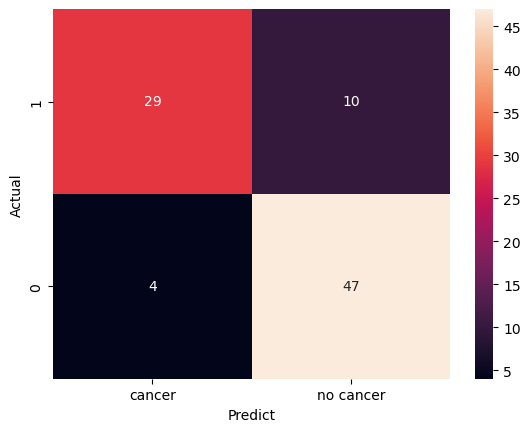

In [130]:
from sklearn.naive_bayes import GaussianNB
nbs=GaussianNB(var_smoothing= 0.0004328761281083057)#by using default parameter
nbs.fit(X_train,y_train)
nbs_pre=nbs.predict(X_test)#predict the test values


print("training data:",nbs.score(X_train,y_train))
print("testing data:",nbs.score(X_test,y_test))
print("-------------------------------------------------------------")
print(metrics.classification_report(y_test,nbs_pre))
print("-----------------------------------------------------------------")
print("accuracy score: ",round(accuracy_score(y_test,nbs_pre)*100,2),"%")
print("-----------------------------------------------------------------")
print("confusion matrix")
confusion_matrix(y_test,nbs_pre)


cm=metrics.confusion_matrix(y_test,nbs_pre)
df_cm=pd.DataFrame(cm,index=[c for c in [1,0]],
                  columns=[c for c in ["cancer","no cancer"]])

sns.heatmap(df_cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Actual")

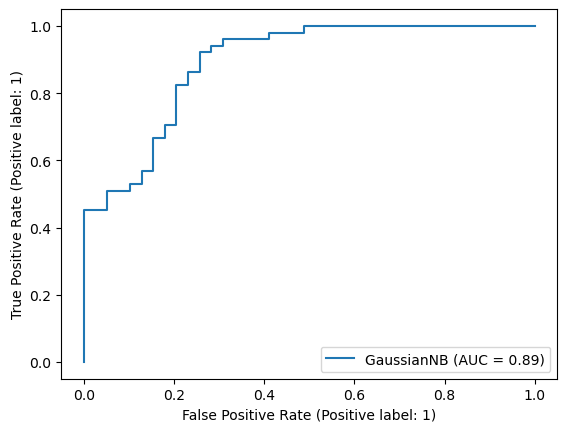

In [131]:
from sklearn.metrics import RocCurveDisplay
curve=RocCurveDisplay.from_estimator(nbs,X_test,y_test)
plt.show(curve)

### save the model

In [132]:
import joblib
joblib.dump(nbs,"nbs")

['nbs']

In [135]:
import joblib as jb
jb.dump(nbs,"nbs")
nb=jb.load("nbs")
nb.score(X_test,y_test)

0.8444444444444444

In [138]:
nbs=joblib.load("nb.joblib")

In [139]:
from tkinter import *
from tkinter import ttk
from tkinter import messagebox


In [140]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1,3,145,233,1,0,150,0,2.3,0.0,0,1,1
1,37.0,1,2,130,250,0,1,187,0,3.5,0.0,0,2,1
2,41.0,0,1,130,204,0,0,172,0,1.4,2.0,0,2,1
3,56.0,1,1,120,236,0,1,178,0,0.8,2.0,0,2,1
4,57.0,0,0,120,354,0,1,163,1,0.6,2.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.0,0,0,140,241,0,1,123,1,0.2,1.0,0,3,0
299,45.0,1,3,110,264,0,1,132,0,1.2,1.0,0,3,0
300,68.0,1,0,144,193,1,1,141,0,3.4,1.0,2,3,0
301,57.0,1,0,130,131,0,1,115,1,1.2,1.0,1,3,0


# GUI

In [152]:
root=Tk()
root.title("HEART DISEASE PREDICTION")
root.geometry("500x900")
root.configure(bg="black")
entries_frame=Frame(root,bg="black")
entries_frame.pack(side=TOP,fill=X)
title=Label(entries_frame,text="HEART DISEASE PREDICTION",font=("calibri",16,"bold"),bg="black",fg="white")
title.grid(row=0,column=1)
title=Label(entries_frame,text="M:1/F:0",font=("calibri",16,"bold"),bg="black",fg="white")
title.grid(row=1,column=2)



print("----------------------------------------------------------------------")
lblage=Label(entries_frame,text="AGE",font=("calibri",14),bg="black",fg='white')
lblage.grid(row=2,column=1)

txtage=Entry(entries_frame,textvariable="AGE",width=10)
txtage.grid(row=2,column=2,padx=10,pady=5,sticky=W)



print("----------------------------------------------------------------------")
lblgender=Label(entries_frame,text="GENDER",font=("calibri",14),bg="black",fg='white')
lblgender.grid(row=3,column=1)

combogender=ttk.Combobox(entries_frame,font=("calibri",17),width=15,textvariable="GENDER",state='readonly')
combogender["values"]=("1","0")
combogender.grid(row=3,column=2,padx=10,pady=5,sticky=W)






print("----------------------------------------------------------------------")
lblcp=Label(entries_frame,text="CHEST PAIN",font=("calibri",14),bg="black",fg='white')
lblcp.grid(row=4,column=1)

combocp=ttk.Combobox(entries_frame,font=("calibri",17),width=15,textvariable="CHEST PAIN",state='readonly')
combocp["values"]=("0","1","2","3")
combocp.grid(row=4,column=2,padx=5,pady=5)




print("----------------------------------------------------------------------")
lbltrestbps=Label(entries_frame,text="TRESTBPS",font=("calibri",14),bg="black",fg='white')
lbltrestbps.grid(row=5,column=1)

txttrestbps=Entry(entries_frame,textvariable="TRESTBPS",width=10)
txttrestbps.grid(row=5,column=2,padx=10,pady=5,sticky=W)



print("----------------------------------------------------------------------")
lblchol=Label(entries_frame,text="CHOL",font=("calibri",14),bg="black",fg='white')
lblchol.grid(row=6,column=1)

txtchol=Entry(entries_frame,textvariable="CHOL",width=10)
txtchol.grid(row=6,column=2,padx=10,pady=5,sticky=W)



print("----------------------------------------------------------------------")
lblfbs=Label(entries_frame,text="FBS",font=("calibri",14),bg="black",fg='white')
lblfbs.grid(row=7,column=1)

combofbs=ttk.Combobox(entries_frame,font=("calibri",17),width=15,textvariable="FBS",state='readonly')
combofbs["values"]=("1","0")
combofbs.grid(row=7,column=2,padx=5,pady=10)



print("----------------------------------------------------------------------")
lblrestecg=Label(entries_frame,text="RESTECG",font=("calibri",14),bg="black",fg='white')
lblrestecg.grid(row=8,column=1)

comborestecg=ttk.Combobox(entries_frame,font=("calibri",17),width=15,textvariable="RESTECG",state='readonly')
comborestecg["values"]=("0","1","2")
comborestecg.grid(row=8,column=2,padx=5,pady=5)





print("----------------------------------------------------------------------")
lblthalach=Label(entries_frame,text="THALACH",font=("calibri",14),bg="black",fg='white')
lblthalach.grid(row=9,column=1)
txtthalach=Entry(entries_frame,textvariable="THALACH",width=10)
txtthalach.grid(row=9,column=2,padx=10,pady=5,sticky=W)



print("----------------------------------------------------------------------")
lblexang=Label(entries_frame,text="EXANG",font=("calibri",14),bg="black",fg='white')
lblexang.grid(row=10,column=1)

comboexang=ttk.Combobox(entries_frame,font=("calibri",17),width=15,textvariable="EXANG",state='readonly')
comboexang["values"]=("1","0")
comboexang.grid(row=10,column=2,padx=5,pady=5)



print("----------------------------------------------------------------------")
lbloldpeak=Label(entries_frame,text="OLDPEAK",font=("calibri",14),bg="black",fg='white')
lbloldpeak.grid(row=11,column=1)
txtoldpeak=Entry(entries_frame,textvariable="OLDPEAK",width=10)
txtoldpeak.grid(row=11,column=2,padx=10,sticky=W,pady=5)




print("----------------------------------------------------------------------")
lblslope=Label(entries_frame,text="SLOPE",font=("calibri",14),bg="black",fg='white')
lblslope.grid(row=12,column=1)

comboslope=ttk.Combobox(entries_frame,font=("calibri",17),width=15,textvariable="SLOPE",state='readonly')
comboslope["values"]=("0.0","1.0","2.0")
comboslope.grid(row=12,column=2,padx=5,pady=5)



print("----------------------------------------------------------------------")
lblca=Label(entries_frame,text="CA ",font=("calibri",14),bg="black",fg='white')
lblca.grid(row=13,column=1)

comboca=ttk.Combobox(entries_frame,font=("calibri",17),width=15,textvariable="CA ",state='readonly')
comboca["values"]=("0","1","2","3","4")
comboca.grid(row=13,column=2,padx=5,pady=10)





print("----------------------------------------------------------------------")
lblthal=Label(entries_frame,text="THALASSEMIA",font=("calibri",14),bg="black",fg='white')
lblthal.grid(row=14,column=1)

combothal=ttk.Combobox(entries_frame,font=("calibri",17),width=15,textvariable="THALASSEMIA",state='readonly')
combothal["values"]=("0","1","2","3")
combothal.grid(row=14,column=2,padx=5,pady=5)









patient= Label(root, text='', bg= 'gray', fg='white', font=('Arial', 12, 'bold'))
patient.pack()


def predictor():  #function to perform the prediction
    
    
    model_nb= joblib.load('nbs')
    
    age = float(txtage.get())    
    gender = int(combogender.get())
    
    cp= int(combocp.get())
    trestbps= int(txttrestbps.get())
    chol= int(txtchol.get())
    fbs= int(combofbs.get())
    restecg= int(comborestecg.get())
    thalach= int(txtthalach.get())
    exang= int(comboexang.get())
    oldpeak= float(txtoldpeak.get())
    slope= float(comboslope.get())
    ca=int(comboca.get())
    thal= int(combothal.get())

    prediction= model_nb.predict([[age, gender, cp, trestbps, chol, fbs, restecg, thalach,
       exang, oldpeak, slope, ca, thal]])
    
    if prediction== 0:
        patient.config(text= 'PATIENT HAS NO DISEASE')
    else:
        patient.config(text= 'PATIENT HAS DISEASE')
        
but_frame=Frame(entries_frame,bg="black")

but_frame.grid(row=19,column=2,padx=4,pady=5,sticky=W)
butpridictor=Button(but_frame,command=predictor,text="RESULT",bg="yellow",fg="black",border=5).grid(row=20,column=2)



       
        
        
        
#label(root,text="flower",bg='red',foreground("black"))
root.mainloop()

----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------
----------------------------------------------------------------------
